<a href="https://colab.research.google.com/github/OlenaMartus/fractional-flow-analysis/blob/main/Oil_Displacement_Efficiency_based_on_Fractional_Flow_Analysis_(includes_Welge_method%2C_gravitational_forces_and_3_cases_of_viscosity).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Oil viscosity Data

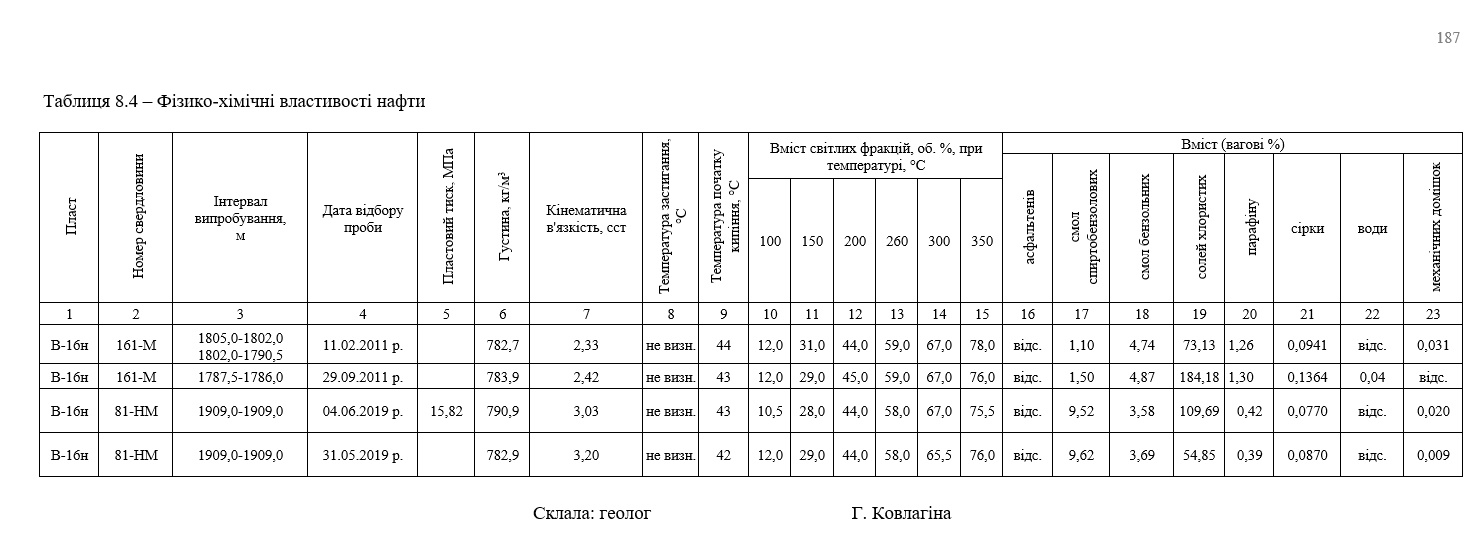

# Step 1: Install and Import Necessary Libraries

First, we'll import the necessary libraries in Google Colab. If you don’t have these libraries installed, Colab usually has them pre-installed.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial import Polynomial


## Step 2: Define the Given Data

We define the input data, including the wetting angle, saturations, viscosities, densities, and other relevant parameters.


In [ ]:
# Step 2: Defining the given data

# Wetting angle through water, degrees
theta_deg_wetting = 25

# Saturations
Swi = 0.1448  # Irreducible water saturation
Sor = 0.375 # Irreducible oil saturation

# Viscosities (Pa·s)
mu_w = 0.0012  # Water viscosity
mu_o_1 = 0.00182  # Oil viscosity №1
mu_o_2 = 0.00218  # Oil viscosity №2
mu_o_3 = 0.00253  # Oil viscosity №3

# Viscosities (cp)
mu_w_cp = 1.2  # Water viscosity
mu_o_1_cp = 1.82  # Oil viscosity №1
mu_o_2_cp = 2.176  # Oil viscosity №2
mu_o_3_cp = 2.531  # Oil viscosity №3


# Densities (kg/m³)
rho_w = 1173  # Water density
rho_o_1 = 782.7  # Oil density №1
rho_o_2 = 786.8  # Oil density №2
rho_o_3 = 790.9  # Oil density №3

# Densities (g/cm³)
rho_w_g_cm3 = 1.173  # Water density (g/cm^3)
rho_o_1_g_cm3 = 0.7827  # Oil density №1 (g/cm^3)
rho_o_2_g_cm3 = 0.7868  # Oil density №2 (g/cm^3)
rho_o_3_g_cm3 = 0.7909  # Oil density №3 (g/cm^3)


# Gravity (m/s²)
g = 9.81

# Layer inclination angle (degrees)
theta_deg_layer = 10.65

# Permeability (m²)
k = 14.9175e-15

# Permeability (md)
k_md = k * 1e+15


# Constants (from the previous step)
conversion_factor_m3_to_bbl = 6.28981  # 1 bbl = 6.28981 m^3
conversion_factor_m2_to_ft2 = 10.7639  # 1 ft^2 = 10.7639 m^2
conversion_factor_m_to_ft= 3.2808 # 1 ft = 3.2808 m
conversion_factor_bbl_to_m3 = 0.158987  # 1 m³ = 0.158987 bbl

# Given data
i_w_m3_per_day = 50  # Water injection rate in m3/day
i_w_bbl_per_day = i_w_m3_per_day * conversion_factor_m3_to_bbl  # Convert to bbl/day
A_m2 = 5106.74  # Cross-sectional area in m^2
A_ft2 = A_m2 * conversion_factor_m2_to_ft2  # Convert to ft^2
A_acre = A_m2 / 4046.856 # Convert to acres
L_m = 562 # Distance between injection and production wells in m
L_ft = L_m * conversion_factor_m_to_ft # Convert to ft
phi = 0.1523  # Porosity
Bo = 1.20 #bbl/STB
Bw = 1.05 #bbl/STB

# Step 2 visualization: Create a pandas DataFrame to visualize the data
data = {
    'Parameter': ['Wetting Angle (degrees)', 'Irreducible Water Saturation', 'Irreducible Oil Saturation',
                  'Water Viscosity (Pa·s)', 'Oil Viscosity (Pa·s)', 'Water Density (kg/m³)',
                  'Oil Density (kg/m³)', 'Gravity (m/s²)', 'Layer Angle (degrees)', 'Permeability (m²)'],
    'Value': [theta_deg_wetting, Swi, Sor, mu_w, mu_o_1, rho_w, rho_o_1, g, theta_deg_layer, k]
}
df = pd.DataFrame(data)

# Displaying the data as a table
df


,Parameter,Value
0,Wetting Angle (degrees),2.500000e+01
1,Irreducible Water Saturation,1.448000e-01
2,Irreducible Oil Saturation,3.750000e-01
3,Water Viscosity (Pa·s),1.200000e-03
4,Oil Viscosity (Pa·s),1.820000e-03
5,Water Density (kg/m³),1.173000e+03
6,Oil Density (kg/m³),7.827000e+02
7,Gravity (m/s²),9.810000e+00
8,Layer Angle (degrees),1.065000e+01
9,Permeability (m²),1.491750e-14


## Step 3: Calculate Corey Exponents Based on Wetting Angle

Now we calculate the Corey exponents
𝑛
corey
n
corey
​
  and
𝑚
corey
m
corey
​
  based on the wetting angle.


In [ ]:
# Step 3: Calculating Corey exponents

# Empirical constants (based on literature or experiment)
alpha = 0.1  # Empirical constant for oil exponent alpha = 0.1
beta = 0.05  # Empirical constant for water exponent beta = 0.05

# Corey exponents dependent on wetting angle
n_corey = alpha * theta_deg_wetting  # Oil relative permeability exponent
m_corey = beta * (90 - theta_deg_wetting)  # Water relative permeability exponent

# Display the calculated Corey exponents
corey_exponents = {
    'Corey Exponent': ['n_corey (Oil)', 'm_corey (Water)'],
    'Value': [n_corey, m_corey]
}
df_corey = pd.DataFrame(corey_exponents)

# Step 3 visualization: Display the Corey exponents as a table
df_corey


,Corey Exponent,Value
0,n_corey (Oil),2.50
1,m_corey (Water),3.25


## Step 4: Define Corey Relative Permeability Models

Now we define the Corey model functions for relative permeability.


In [ ]:
# Step 4: Defining Corey relative permeability models

# Corey model for water relative permeability
def krw(S_w, Swi, Sor, m):
    return ((S_w - Swi) / (1 - Swi - Sor)) ** m

# Corey model for oil relative permeability
def kro(S_w, Swi, Sor, n):
    return ((1 - Sor - S_w) / (1 - Swi - Sor)) ** n


# Step 5: Calculate and Plot Relative Permeability Curves

Next, we calculate the relative permeability for water and oil across a range of water saturations and plot the curves.

> Додати блок цитати



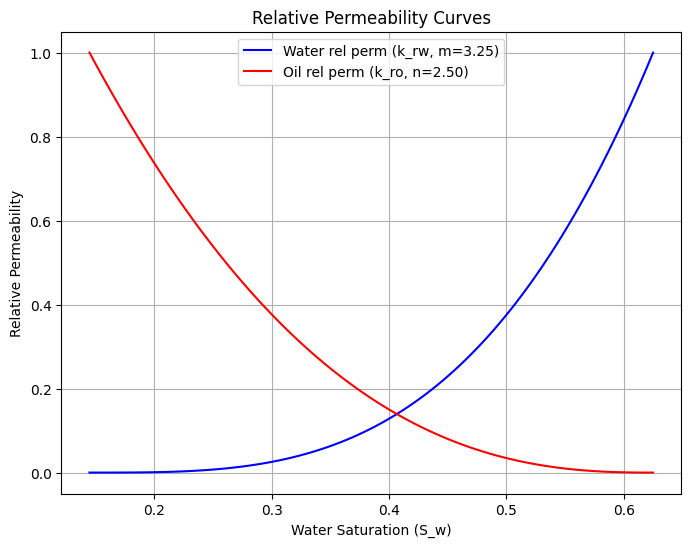

In [ ]:
# Step 5: Calculating and plotting relative permeability curves

# Define a range of water saturation values
S_w = np.linspace(Swi, 1 - Sor, 100)

# Calculate relative permeabilities using the Corey exponents
k_rw = krw(S_w, Swi, Sor, m_corey)
k_ro = kro(S_w, Swi, Sor, n_corey)

# Step 5 visualization: Plot the relative permeability curves
plt.figure(figsize=(8, 6))
plt.plot(S_w, k_rw, label=f"Water rel perm (k_rw, m={m_corey:.2f})", color='b')
plt.plot(S_w, k_ro, label=f"Oil rel perm (k_ro, n={n_corey:.2f})", color='r')
plt.xlabel('Water Saturation (S_w)')
plt.ylabel('Relative Permeability')
plt.title('Relative Permeability Curves')
plt.legend()
plt.grid(True)
plt.show()


#Step 6: Calculation of the Fractional Flow Curve (No Gravity)  (With Gravity)



We will calculate the fractional flow curve, considering the slope of the formation and the water movement, where the injection well is located lower than the production well. The calculation uses the previously calculated relative permeability curves.


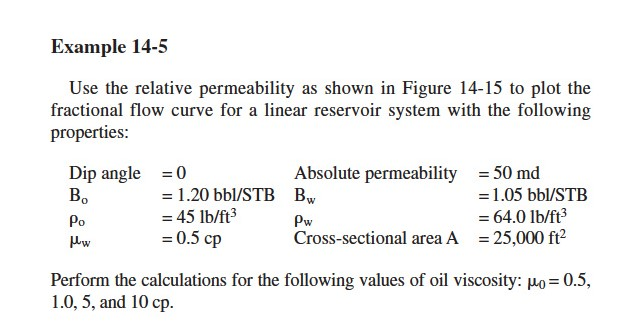

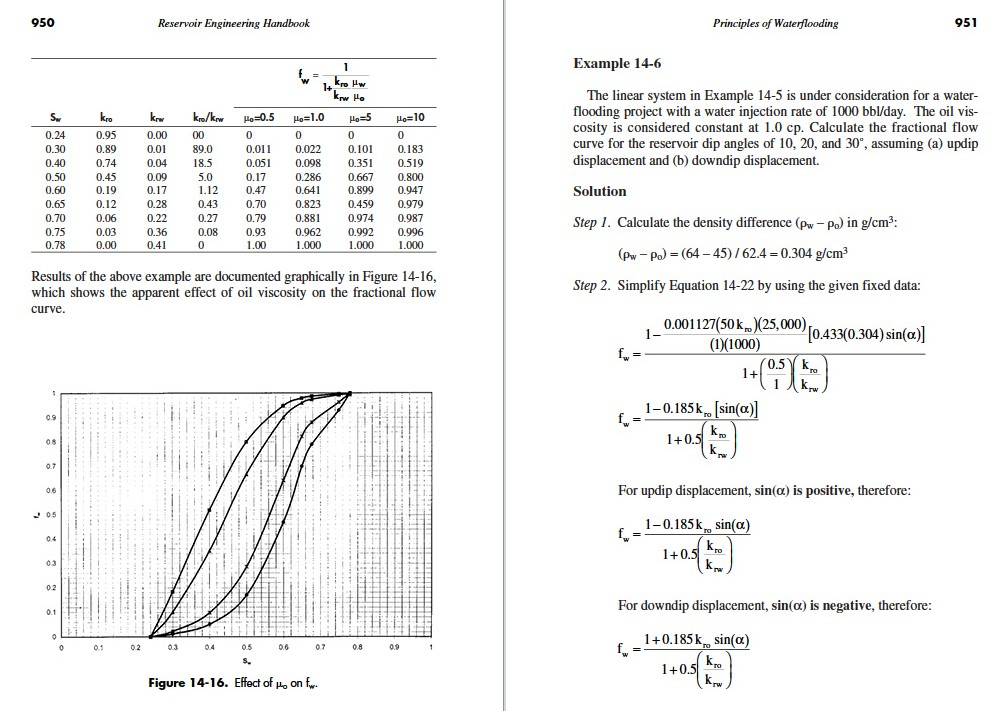

<ipython-input-6-68bacd3d5354>:9: RuntimeWarning: divide by zero encountered in divide
  Y_1 = (k_ro * mu_w_cp) / (k_rw * mu_o_1_cp)
<ipython-input-6-68bacd3d5354>:18: RuntimeWarning: divide by zero encountered in divide
  Y_2 = (k_ro * mu_w_cp) / (k_rw * mu_o_2_cp)
<ipython-input-6-68bacd3d5354>:27: RuntimeWarning: divide by zero encountered in divide
  Y_3 = (k_ro * mu_w_cp) / (k_rw * mu_o_3_cp)


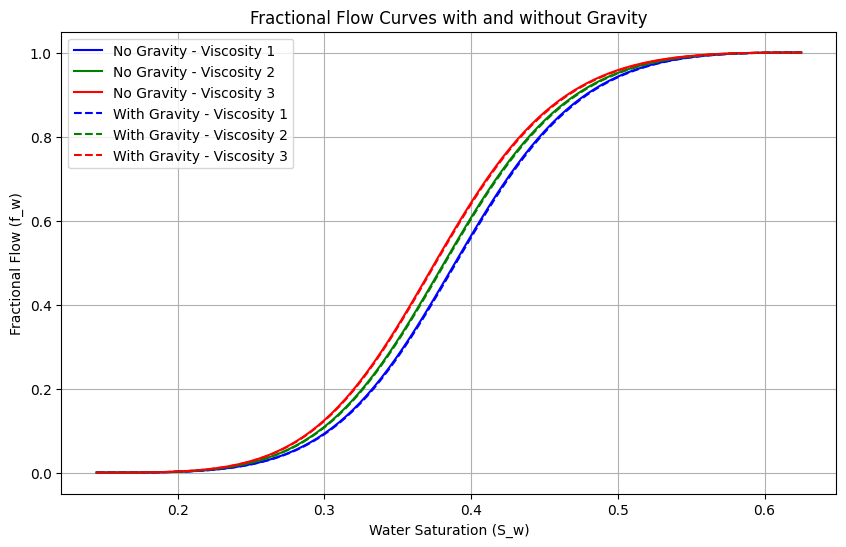

,Water Saturation (S_w),Fractional Flow (No Gravity - Viscosity 1),Fractional Flow (With Gravity - Viscosity 1),Fractional Flow (No Gravity - Viscosity 2),Fractional Flow (With Gravity - Viscosity 2),Fractional Flow (No Gravity - Viscosity 3),Fractional Flow (With Gravity - Viscosity 3)
0,0.144800,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.149651,5.082745e-07,4.832860e-07,6.076952e-07,5.829692e-07,7.068366e-07,6.823731e-07
2,0.154501,4.961120e-06,4.723389e-06,5.931531e-06,5.696298e-06,6.899215e-06,6.666479e-06
3,0.159352,1.901610e-05,1.812818e-05,2.273565e-05,2.185706e-05,2.644472e-05,2.557546e-05
4,0.164202,4.971966e-05,4.745807e-05,5.944446e-05,5.720665e-05,6.914176e-05,6.692773e-05
...,...,...,...,...,...,...,...
95,0.605598,9.997527e-01,9.997361e-01,9.997931e-01,9.997794e-01,9.998221e-01,9.998105e-01
96,0.610448,9.998835e-01,9.998755e-01,9.999026e-01,9.998959e-01,9.999162e-01,9.999106e-01
97,0.615299,9.999591e-01,9.999562e-01,9.999658e-01,9.999634e-01,9.999706e-01,9.999686e-01
98,0.620149,9.999930e-01,9.999925e-01,9.999942e-01,9.999937e-01,9.999950e-01,9.999946e-01


In [ ]:
# Step 6: Calculation of the fractional flow curve

# Correct fractional flow calculation with proper radian conversion
theta = np.radians(theta_deg_layer) # Convert dip angle to radians

# Fractional Flow with Gravity (for 1 viscosity)
# Step 1: Calculate X and Y terms
X_1 = (0.001127 * 0.433 * k_md * k_ro * A_ft2 * (rho_w_g_cm3 - rho_o_1_g_cm3)) / mu_o_1_cp
Y_1 = (k_ro * mu_w_cp) / (k_rw * mu_o_1_cp)
# Step 2: Calculate the fractional flow curves
fw_no_gravity_1 = 1 / (1 + Y_1)  # Fractional Flow without Gravity
# Fractional Flow with Gravity using the updated formula
fw_with_gravity_1 = (1 - (X_1 * np.sin(theta) / i_w_bbl_per_day)) / (1 + Y_1)

# Fractional Flow with Gravity (for 2 viscosity)
# Step 1: Calculate X and Y terms
X_2 = (0.001127 * 0.433 * k_md * k_ro * A_ft2 * (rho_w_g_cm3 - rho_o_2_g_cm3)) / mu_o_2_cp
Y_2 = (k_ro * mu_w_cp) / (k_rw * mu_o_2_cp)
# Step 2: Calculate the fractional flow curves
fw_no_gravity_2 = 1 / (1 + Y_2)  # Fractional Flow without Gravity
# Fractional Flow with Gravity using the updated formula
fw_with_gravity_2 = (1 - (X_2 * np.sin(theta) / i_w_bbl_per_day)) / (1 + Y_2)

# Fractional Flow with Gravity (for 3 viscosity)
# Step 1: Calculate X and Y terms
X_3 = (0.001127 * 0.433 * k_md * k_ro * A_ft2 * (rho_w_g_cm3 - rho_o_3_g_cm3)) / mu_o_3_cp
Y_3 = (k_ro * mu_w_cp) / (k_rw * mu_o_3_cp)
# Step 2: Calculate the fractional flow curves
fw_no_gravity_3 = 1 / (1 + Y_3)  # Fractional Flow without Gravity
# Fractional Flow with Gravity using the updated formula
fw_with_gravity_3 = (1 - (X_3 * np.sin(theta) / i_w_bbl_per_day)) / (1 + Y_3)

# Plotting the fractional flow curves
plt.figure(figsize=(10, 6))

# Plot fw_no_gravity curves for each viscosity
plt.plot(S_w, fw_no_gravity_1 * np.ones_like(S_w), label='No Gravity - Viscosity 1', color='b')
plt.plot(S_w, fw_no_gravity_2 * np.ones_like(S_w), label='No Gravity - Viscosity 2', color='g')
plt.plot(S_w, fw_no_gravity_3 * np.ones_like(S_w), label='No Gravity - Viscosity 3', color='r')

# Plot fw_with_gravity curves for each viscosity
plt.plot(S_w, fw_with_gravity_1 * np.ones_like(S_w), 'b--', label='With Gravity - Viscosity 1')
plt.plot(S_w, fw_with_gravity_2 * np.ones_like(S_w), 'g--', label='With Gravity - Viscosity 2')
plt.plot(S_w, fw_with_gravity_3 * np.ones_like(S_w), 'r--', label='With Gravity - Viscosity 3')

plt.xlabel('Water Saturation (S_w)')
plt.ylabel('Fractional Flow (f_w)')
plt.title('Fractional Flow Curves with and without Gravity')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Create a table of results
table_data = {
    'Water Saturation (S_w)': S_w,
    'Fractional Flow (No Gravity - Viscosity 1)': fw_no_gravity_1 * np.ones_like(S_w),
    'Fractional Flow (With Gravity - Viscosity 1)': fw_with_gravity_1 * np.ones_like(S_w),
    'Fractional Flow (No Gravity - Viscosity 2)': fw_no_gravity_2 * np.ones_like(S_w),
    'Fractional Flow (With Gravity - Viscosity 2)': fw_with_gravity_2 * np.ones_like(S_w),
    'Fractional Flow (No Gravity - Viscosity 3)': fw_no_gravity_3 * np.ones_like(S_w),
    'Fractional Flow (With Gravity - Viscosity 3)': fw_with_gravity_3 * np.ones_like(S_w),
}

df_table = pd.DataFrame(table_data)

# Display the first 100 rows of the corrected output table
df_table.head(100)  # Display first 10 rows of the table


## Step 7: Output Table with Saturation, Relative Permeabilities, and Fractional Flow (With Gravity)

We will generate a table with four columns: water saturation, water relative permeability, oil relative permeability, and fractional flow.


In [ ]:
# Step 7: Output table with corrected 4 columns (Sw, krw, kro, fw) matching the plotted data

# Ensure that water saturation values, relative permeabilities, and fractional flow values are recalculated in line with plotted data
output_data = {
    'Water Saturation (Sw)': S_w,            # Correct water saturation from Swi to 1 - Sor
    'Water Rel Perm (krw)': k_rw,            # Water relative permeability from Step 5
    'Oil Rel Perm (kro)': k_ro,              # Oil relative permeability from Step 5
    'Fractional Flow (No Gravity - Viscosity 1)': fw_no_gravity_1 * np.ones_like(S_w),
    'Fractional Flow (No Gravity - Viscosity 2)': fw_no_gravity_2 * np.ones_like(S_w),
    'Fractional Flow (No Gravity - Viscosity 3)': fw_no_gravity_3 * np.ones_like(S_w),
    'Fractional Flow (With Gravity - Viscosity 1)': fw_with_gravity_1 * np.ones_like(S_w),
    'Fractional Flow (With Gravity - Viscosity 2)': fw_with_gravity_2 * np.ones_like(S_w),
    'Fractional Flow (With Gravity - Viscosity 3)': fw_with_gravity_3 * np.ones_like(S_w),
}

# Create a pandas DataFrame for the corrected output table
df_output_corrected = pd.DataFrame(output_data)

# Display the first 100 rows of the corrected output table
df_output_corrected.head(100)


,Water Saturation (Sw),Water Rel Perm (krw),Oil Rel Perm (kro),Fractional Flow (No Gravity - Viscosity 1),Fractional Flow (No Gravity - Viscosity 2),Fractional Flow (No Gravity - Viscosity 3),Fractional Flow (With Gravity - Viscosity 1),Fractional Flow (With Gravity - Viscosity 2),Fractional Flow (With Gravity - Viscosity 3)
0,0.144800,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.149651,3.267274e-07,0.974938,5.082745e-07,6.076952e-07,7.068366e-07,4.832860e-07,5.829692e-07,6.823731e-07
2,0.154501,3.108373e-06,0.950258,4.961120e-06,5.931531e-06,6.899215e-06,4.723389e-06,5.696298e-06,6.666479e-06
3,0.159352,1.160993e-05,0.925955,1.901610e-05,2.273565e-05,2.644472e-05,1.812818e-05,2.185706e-05,2.557546e-05
4,0.164202,2.957199e-05,0.902030,4.971966e-05,5.944446e-05,6.914176e-05,4.745807e-05,5.720665e-05,6.692773e-05
...,...,...,...,...,...,...,...,...,...
95,0.605598,8.745554e-01,0.000328,9.997527e-01,9.997931e-01,9.998221e-01,9.997361e-01,9.997794e-01,9.998105e-01
96,0.610448,9.048303e-01,0.000160,9.998835e-01,9.999026e-01,9.999162e-01,9.998755e-01,9.998959e-01,9.999106e-01
97,0.615299,9.358231e-01,0.000058,9.999591e-01,9.999658e-01,9.999706e-01,9.999562e-01,9.999634e-01,9.999686e-01
98,0.620149,9.675432e-01,0.000010,9.999930e-01,9.999942e-01,9.999950e-01,9.999925e-01,9.999937e-01,9.999946e-01


# Step 8.1: Drawing the Tangent and Finding Breakthrough Point (No Gravity). For three viscosity cases.

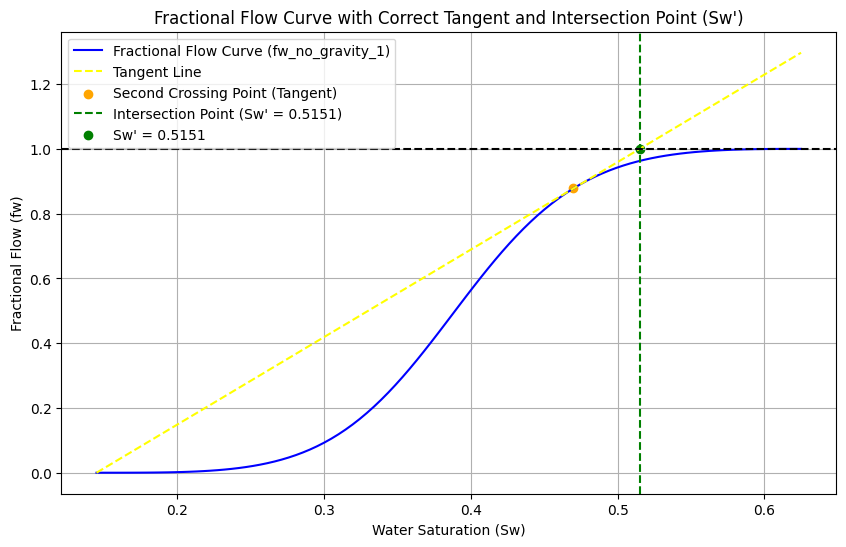

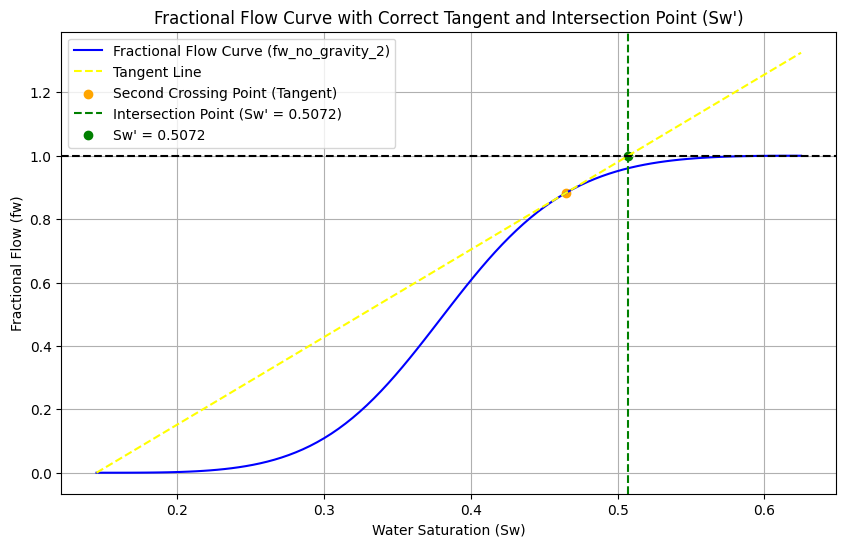

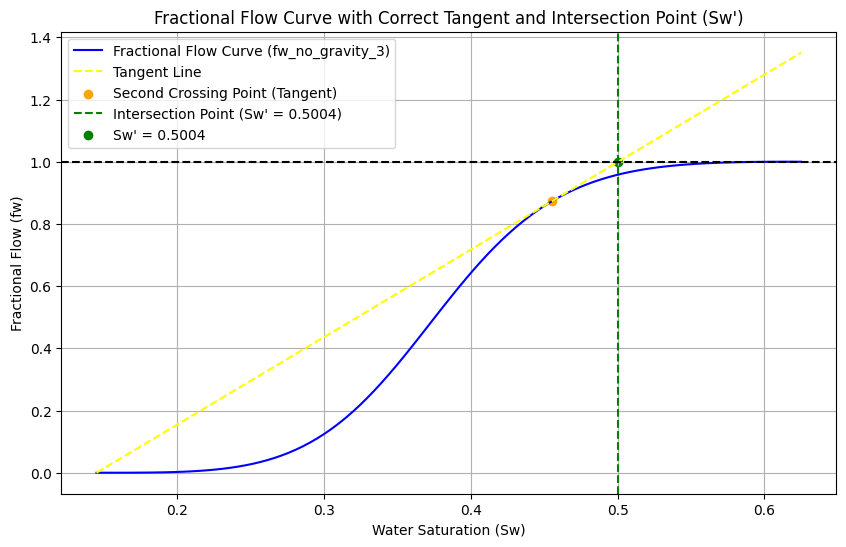

In [ ]:
# Step 8: Drawing the correct tangent to the fractional flow curve and finding Sw'

# First derivative (slope) of the fractional flow curve to help identify the tangent point
d_fw_d_Sw_1_ng = np.gradient(fw_no_gravity_1, S_w)
# Initialize breakthrough_idx_1
breakthrough_idx_1_ng = None
# Loop through the points of the curve to find the tangent point
for i in range(1, len(S_w)):
    slope_tangent_test_1_ng = (fw_no_gravity_1[i] - fw_no_gravity_1[0]) / (S_w[i] - S_w[0])
    fw_tangent_test_1_ng = slope_tangent_test_1_ng * (S_w - S_w[0]) + fw_no_gravity_1[0]
    # Allow for slight deviations and use a threshold to handle numerical inaccuracies
    tolerance_1_ng = 1e-5
    if np.all(fw_tangent_test_1_ng[:i] >= (fw_no_gravity_1[:i] - tolerance_1_ng)) and np.all(fw_tangent_test_1_ng[i:] >= (fw_no_gravity_1[i:] - tolerance_1_ng)):
        breakthrough_idx_1_ng = i
        break
# Check if we found a valid tangent
if breakthrough_idx_1_ng is None:
    raise ValueError("No valid tangent line found that satisfies the condition.")
# Calculate the slope of the tangent line
slope_tangent_1_ng = (fw_no_gravity_1[breakthrough_idx_1_ng] - fw_no_gravity_1[0]) / (S_w[breakthrough_idx_1_ng] - S_w[0])
# Equation of the tangent line
fw_tangent_1_ng = slope_tangent_1_ng * (S_w - S_w[0]) + fw_no_gravity_1[0]
# Extend the tangent line to find where y = 1 (Sw')
S_w_dash_1_ng = (1 - fw_no_gravity_1[0]) / slope_tangent_1_ng + S_w[0]

# Visualization: Plot the fractional flow curve and the tangent line
plt.figure(figsize=(10, 6))
plt.plot(S_w, fw_no_gravity_1, label='Fractional Flow Curve (fw_no_gravity_1)', color='b')
plt.plot(S_w, fw_tangent_1_ng, '--', label='Tangent Line', color='yellow')
plt.scatter(S_w[breakthrough_idx_1_ng], fw_no_gravity_1[breakthrough_idx_1_ng], color='orange', label='Second Crossing Point (Tangent)')
plt.axvline(x=S_w_dash_1_ng, color='green', linestyle='--', label=f'Intersection Point (Sw\' = {S_w_dash_1_ng:.4f})')
plt.scatter(S_w_dash_1_ng, 1, color='green', label=f'Sw\' = {S_w_dash_1_ng:.4f}')
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw)')
plt.title('Fractional Flow Curve with Correct Tangent and Intersection Point (Sw\')')
plt.legend()
plt.grid(True)
plt.show()

# First derivative (slope) of the fractional flow curve to help identify the tangent point
d_fw_d_Sw_2_ng = np.gradient(fw_no_gravity_2, S_w)
# Initialize breakthrough_idx_2
breakthrough_idx_2_ng = None
# Loop through the points of the curve to find the tangent point
for i in range(1, len(S_w)):
    slope_tangent_test_2_ng = (fw_no_gravity_2[i] - fw_no_gravity_2[0]) / (S_w[i] - S_w[0])
    fw_tangent_test_2_ng = slope_tangent_test_2_ng * (S_w - S_w[0]) + fw_no_gravity_2[0]
    # Allow for slight deviations and use a threshold to handle numerical inaccuracies
    tolerance_2_ng = 1e-5
    if np.all(fw_tangent_test_2_ng[:i] >= (fw_no_gravity_2[:i] - tolerance_2_ng)) and np.all(fw_tangent_test_2_ng[i:] >= (fw_no_gravity_2[i:] - tolerance_2_ng)):
        breakthrough_idx_2_ng = i
        break
# Check if we found a valid tangent
if breakthrough_idx_2_ng is None:
    raise ValueError("No valid tangent line found that satisfies the condition.")
# Calculate the slope of the tangent line
slope_tangent_2_ng = (fw_no_gravity_2[breakthrough_idx_2_ng] - fw_no_gravity_2[0]) / (S_w[breakthrough_idx_2_ng] - S_w[0])
# Equation of the tangent line
fw_tangent_2_ng = slope_tangent_2_ng * (S_w - S_w[0]) + fw_no_gravity_2[0]
# Extend the tangent line to find where y = 1 (Sw')
S_w_dash_2_ng = (1 - fw_no_gravity_2[0]) / slope_tangent_2_ng + S_w[0]

# Visualization: Plot the fractional flow curve and the tangent line
plt.figure(figsize=(10, 6))
plt.plot(S_w, fw_no_gravity_2, label='Fractional Flow Curve (fw_no_gravity_2)', color='b')
plt.plot(S_w, fw_tangent_2_ng, '--', label='Tangent Line', color='yellow')
plt.scatter(S_w[breakthrough_idx_2_ng], fw_no_gravity_2[breakthrough_idx_2_ng], color='orange', label='Second Crossing Point (Tangent)')
plt.axvline(x=S_w_dash_2_ng, color='green', linestyle='--', label=f'Intersection Point (Sw\' = {S_w_dash_2_ng:.4f})')
plt.scatter(S_w_dash_2_ng, 1, color='green', label=f'Sw\' = {S_w_dash_2_ng:.4f}')
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw)')
plt.title('Fractional Flow Curve with Correct Tangent and Intersection Point (Sw\')')
plt.legend()
plt.grid(True)
plt.show()


# First derivative (slope) of the fractional flow curve to help identify the tangent point
d_fw_d_Sw_3_ng = np.gradient(fw_no_gravity_3, S_w)
# Initialize breakthrough_idx_3
breakthrough_idx_3_ng = None
# Loop through the points of the curve to find the tangent point
for i in range(1, len(S_w)):
    slope_tangent_test_3_ng = (fw_no_gravity_3[i] - fw_no_gravity_3[0]) / (S_w[i] - S_w[0])
    fw_tangent_test_3_ng = slope_tangent_test_3_ng * (S_w - S_w[0]) + fw_no_gravity_3[0]
    # Allow for slight deviations and use a threshold to handle numerical inaccuracies
    tolerance_3_ng = 1e-5
    if np.all(fw_tangent_test_3_ng[:i] >= (fw_no_gravity_3[:i] - tolerance_3_ng)) and np.all(fw_tangent_test_3_ng[i:] >= (fw_no_gravity_3[i:] - tolerance_3_ng)):
        breakthrough_idx_3_ng = i
        break
# Check if we found a valid tangent
if breakthrough_idx_3_ng is None:
    raise ValueError("No valid tangent line found that satisfies the condition.")
# Calculate the slope of the tangent line
slope_tangent_3_ng = (fw_no_gravity_3[breakthrough_idx_3_ng] - fw_no_gravity_3[0]) / (S_w[breakthrough_idx_3_ng] - S_w[0])
# Equation of the tangent line
fw_tangent_3_ng = slope_tangent_3_ng * (S_w - S_w[0]) + fw_no_gravity_3[0]
# Extend the tangent line to find where y = 1 (Sw')
S_w_dash_3_ng = (1 - fw_no_gravity_3[0]) / slope_tangent_3_ng + S_w[0]

# Visualization: Plot the fractional flow curve and the tangent line
plt.figure(figsize=(10, 6))
plt.plot(S_w, fw_no_gravity_3, label='Fractional Flow Curve (fw_no_gravity_3)', color='b')
plt.plot(S_w, fw_tangent_3_ng, '--', label='Tangent Line', color='yellow')
plt.scatter(S_w[breakthrough_idx_3_ng], fw_no_gravity_3[breakthrough_idx_3_ng], color='orange', label='Second Crossing Point (Tangent)')
plt.axvline(x=S_w_dash_3_ng, color='green', linestyle='--', label=f'Intersection Point (Sw\' = {S_w_dash_3_ng:.4f})')
plt.scatter(S_w_dash_3_ng, 1, color='green', label=f'Sw\' = {S_w_dash_3_ng:.4f}')
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw)')
plt.title('Fractional Flow Curve with Correct Tangent and Intersection Point (Sw\')')
plt.legend()
plt.grid(True)
plt.show()



## Step 8.2: Drawing the Tangent and Finding Breakthrough Point (With Gravity). For three viscosity cases.



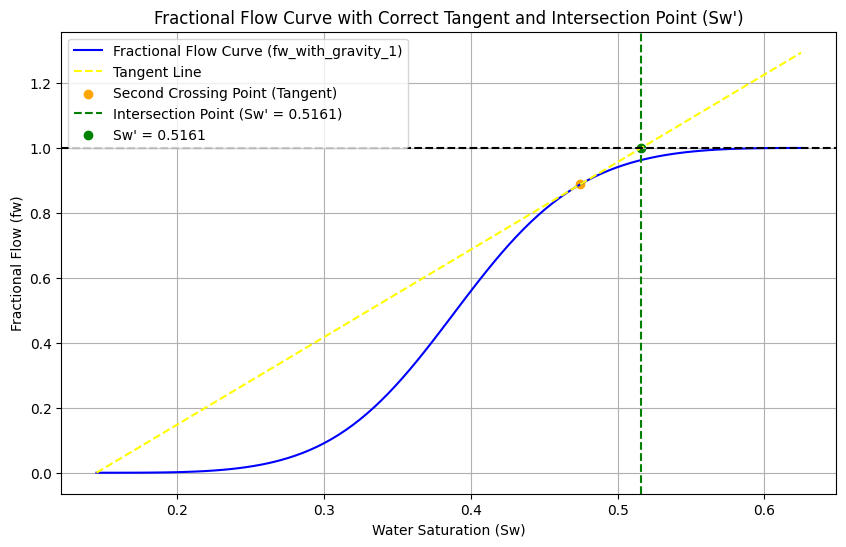

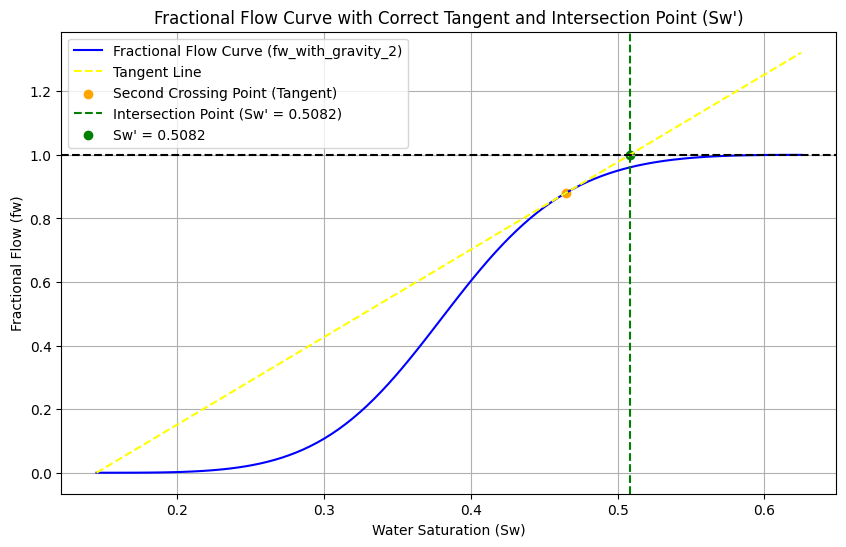

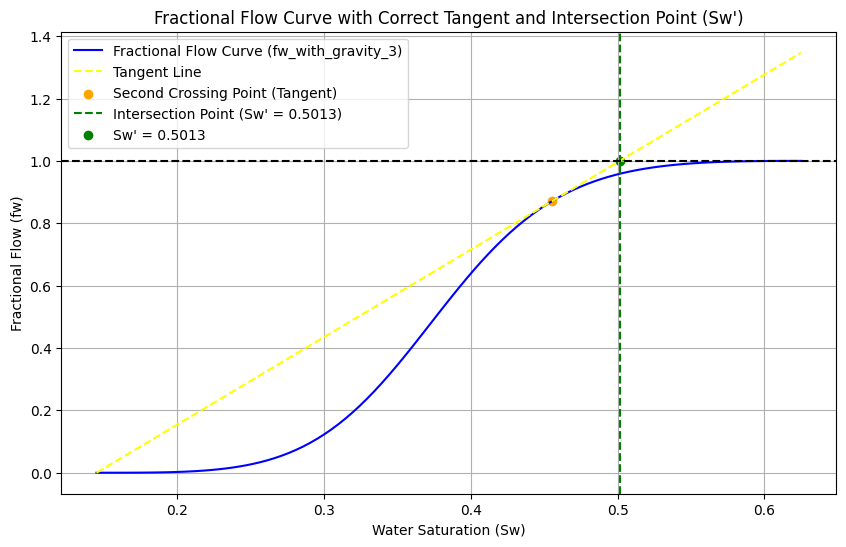

In [ ]:
# Step 8: Drawing the correct tangent to the fractional flow curve and finding Sw'

# First derivative (slope) of the fractional flow curve to help identify the tangent point
d_fw_d_Sw_1 = np.gradient(fw_with_gravity_1, S_w)
# Initialize breakthrough_idx_1
breakthrough_idx_1 = None
# Loop through the points of the curve to find the tangent point
for i in range(1, len(S_w)):
    slope_tangent_test_1 = (fw_with_gravity_1[i] - fw_with_gravity_1[0]) / (S_w[i] - S_w[0])
    fw_tangent_test_1 = slope_tangent_test_1 * (S_w - S_w[0]) + fw_with_gravity_1[0]
    # Allow for slight deviations and use a threshold to handle numerical inaccuracies
    tolerance_1 = 1e-5
    if np.all(fw_tangent_test_1[:i] >= (fw_with_gravity_1[:i] - tolerance_1)) and np.all(fw_tangent_test_1[i:] >= (fw_with_gravity_1[i:] - tolerance_1)):
        breakthrough_idx_1 = i
        break
# Check if we found a valid tangent
if breakthrough_idx_1 is None:
    raise ValueError("No valid tangent line found that satisfies the condition.")
# Calculate the slope of the tangent line
slope_tangent_1 = (fw_with_gravity_1[breakthrough_idx_1] - fw_with_gravity_1[0]) / (S_w[breakthrough_idx_1] - S_w[0])
# Equation of the tangent line
fw_tangent_1 = slope_tangent_1 * (S_w - S_w[0]) + fw_with_gravity_1[0]
# Extend the tangent line to find where y = 1 (Sw')
S_w_dash_1 = (1 - fw_with_gravity_1[0]) / slope_tangent_1 + S_w[0]

# Visualization: Plot the fractional flow curve and the tangent line
plt.figure(figsize=(10, 6))
plt.plot(S_w, fw_with_gravity_1, label='Fractional Flow Curve (fw_with_gravity_1)', color='b')
plt.plot(S_w, fw_tangent_1, '--', label='Tangent Line', color='yellow')
plt.scatter(S_w[breakthrough_idx_1], fw_with_gravity_1[breakthrough_idx_1], color='orange', label='Second Crossing Point (Tangent)')
plt.axvline(x=S_w_dash_1, color='green', linestyle='--', label=f'Intersection Point (Sw\' = {S_w_dash_1:.4f})')
plt.scatter(S_w_dash_1, 1, color='green', label=f'Sw\' = {S_w_dash_1:.4f}')
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw)')
plt.title('Fractional Flow Curve with Correct Tangent and Intersection Point (Sw\')')
plt.legend()
plt.grid(True)
plt.show()

# First derivative (slope) of the fractional flow curve to help identify the tangent point
d_fw_d_Sw_2 = np.gradient(fw_with_gravity_2, S_w)
# Initialize breakthrough_idx_2
breakthrough_idx_2 = None
# Loop through the points of the curve to find the tangent point
for i in range(1, len(S_w)):
    slope_tangent_test_2 = (fw_with_gravity_2[i] - fw_with_gravity_2[0]) / (S_w[i] - S_w[0])
    fw_tangent_test_2 = slope_tangent_test_2 * (S_w - S_w[0]) + fw_with_gravity_2[0]
    # Allow for slight deviations and use a threshold to handle numerical inaccuracies
    tolerance_2 = 1e-5
    if np.all(fw_tangent_test_2[:i] >= (fw_with_gravity_2[:i] - tolerance_2)) and np.all(fw_tangent_test_2[i:] >= (fw_with_gravity_2[i:] - tolerance_2)):
        breakthrough_idx_2 = i
        break
# Check if we found a valid tangent
if breakthrough_idx_2 is None:
    raise ValueError("No valid tangent line found that satisfies the condition.")
# Calculate the slope of the tangent line
slope_tangent_2 = (fw_with_gravity_2[breakthrough_idx_2] - fw_with_gravity_2[0]) / (S_w[breakthrough_idx_2] - S_w[0])
# Equation of the tangent line
fw_tangent_2 = slope_tangent_2 * (S_w - S_w[0]) + fw_with_gravity_2[0]
# Extend the tangent line to find where y = 1 (Sw')
S_w_dash_2 = (1 - fw_with_gravity_2[0]) / slope_tangent_2 + S_w[0]

# Visualization: Plot the fractional flow curve and the tangent line
plt.figure(figsize=(10, 6))
plt.plot(S_w, fw_with_gravity_2, label='Fractional Flow Curve (fw_with_gravity_2)', color='b')
plt.plot(S_w, fw_tangent_2, '--', label='Tangent Line', color='yellow')
plt.scatter(S_w[breakthrough_idx_2], fw_with_gravity_2[breakthrough_idx_2], color='orange', label='Second Crossing Point (Tangent)')
plt.axvline(x=S_w_dash_2, color='green', linestyle='--', label=f'Intersection Point (Sw\' = {S_w_dash_2:.4f})')
plt.scatter(S_w_dash_2, 1, color='green', label=f'Sw\' = {S_w_dash_2:.4f}')
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw)')
plt.title('Fractional Flow Curve with Correct Tangent and Intersection Point (Sw\')')
plt.legend()
plt.grid(True)
plt.show()


# First derivative (slope) of the fractional flow curve to help identify the tangent point
d_fw_d_Sw_3 = np.gradient(fw_with_gravity_3, S_w)
# Initialize breakthrough_idx_3
breakthrough_idx_3 = None
# Loop through the points of the curve to find the tangent point
for i in range(1, len(S_w)):
    slope_tangent_test_3 = (fw_with_gravity_3[i] - fw_with_gravity_3[0]) / (S_w[i] - S_w[0])
    fw_tangent_test_3 = slope_tangent_test_3 * (S_w - S_w[0]) + fw_with_gravity_3[0]
    # Allow for slight deviations and use a threshold to handle numerical inaccuracies
    tolerance_3 = 1e-5
    if np.all(fw_tangent_test_3[:i] >= (fw_with_gravity_3[:i] - tolerance_3)) and np.all(fw_tangent_test_3[i:] >= (fw_with_gravity_3[i:] - tolerance_3)):
        breakthrough_idx_3 = i
        break
# Check if we found a valid tangent
if breakthrough_idx_3 is None:
    raise ValueError("No valid tangent line found that satisfies the condition.")
# Calculate the slope of the tangent line
slope_tangent_3 = (fw_with_gravity_3[breakthrough_idx_3] - fw_with_gravity_3[0]) / (S_w[breakthrough_idx_3] - S_w[0])
# Equation of the tangent line
fw_tangent_3 = slope_tangent_3 * (S_w - S_w[0]) + fw_with_gravity_3[0]
# Extend the tangent line to find where y = 1 (Sw')
S_w_dash_3 = (1 - fw_with_gravity_3[0]) / slope_tangent_3 + S_w[0]

# Visualization: Plot the fractional flow curve and the tangent line
plt.figure(figsize=(10, 6))
plt.plot(S_w, fw_with_gravity_3, label='Fractional Flow Curve (fw_with_gravity_3)', color='b')
plt.plot(S_w, fw_tangent_3, '--', label='Tangent Line', color='yellow')
plt.scatter(S_w[breakthrough_idx_3], fw_with_gravity_3[breakthrough_idx_3], color='orange', label='Second Crossing Point (Tangent)')
plt.axvline(x=S_w_dash_3, color='green', linestyle='--', label=f'Intersection Point (Sw\' = {S_w_dash_3:.4f})')
plt.scatter(S_w_dash_3, 1, color='green', label=f'Sw\' = {S_w_dash_3:.4f}')
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw)')
plt.title('Fractional Flow Curve with Correct Tangent and Intersection Point (Sw\')')
plt.legend()
plt.grid(True)
plt.show()



#Step 9: Calculation of Oil Displacement Coefficient at the Breakthroughs (No Gravity) (With Gravity)
This remains the same, and you can use the previously provided code for Step 9 to calculate the recovery factor.

In [ ]:
# Step 9: Visualization of Breakthrough Water Saturation and Recovery Factor (RF)

# Formula 8: Ed_BT = (Sw_dash - Swi) / (1 - Swi)
Ed_BT_1_ng = (S_w_dash_1_ng - Swi) / (1 - Swi)
Ed_BT_2_ng = (S_w_dash_2_ng - Swi) / (1 - Swi)
Ed_BT_3_ng = (S_w_dash_3_ng - Swi) / (1 - Swi)
Ed_BT_1_wg = (S_w_dash_1 - Swi) / (1 - Swi)
Ed_BT_2_wg = (S_w_dash_2 - Swi) / (1 - Swi)
Ed_BT_3_wg = (S_w_dash_3 - Swi) / (1 - Swi)

# Step 9 visualization: Create a table to show the results, including the breakthrough point
rf_data = {
    'Viscosity Label': ['For Viscosity #1 (NO gravity)', 'For Viscosity #2 (NO gravity)', 'For Viscosity #3 (NO gravity)', 'For Viscosity #1 (WITH gravity)', 'For Viscosity #2 (WITH gravity)', 'For Viscosity #3 (WITH gravity)'],
    'Breakthrough Water Saturation (Sw_breakthrough)': [S_w[breakthrough_idx_1_ng], S_w[breakthrough_idx_2_ng], S_w[breakthrough_idx_3_ng], S_w[breakthrough_idx_1], S_w[breakthrough_idx_2], S_w[breakthrough_idx_3]],  # Add breakthrough Sw
    'Residual Water Saturation (Sw\' - Intersection)': [S_w_dash_1_ng, S_w_dash_2_ng, S_w_dash_3_ng, S_w_dash_1, S_w_dash_2, S_w_dash_3],
    'Oil Recovery Factor (Ed_BT)': [Ed_BT_1_ng, Ed_BT_2_ng, Ed_BT_3_ng, Ed_BT_1_wg, Ed_BT_2_wg, Ed_BT_3_wg]
}
df_rf = pd.DataFrame(rf_data)
# Display the results in a table
df_rf


,Viscosity Label,Breakthrough Water Saturation (Sw_breakthrough),Residual Water Saturation (Sw' - Intersection),Oil Recovery Factor (Ed_BT)
0,For Viscosity #1 (NO gravity),0.469784,0.515056,0.432947
1,For Viscosity #2 (NO gravity),0.464933,0.507234,0.423800
2,For Viscosity #3 (NO gravity),0.455232,0.500383,0.415790
3,For Viscosity #1 (WITH gravity),0.474634,0.516108,0.434177
4,For Viscosity #2 (WITH gravity),0.464933,0.508207,0.424938
5,For Viscosity #3 (WITH gravity),0.455232,0.501324,0.416890


#Step 10.1: Define and Visualize the Fractional Derivative (No Gravity). For three viscosity cases.

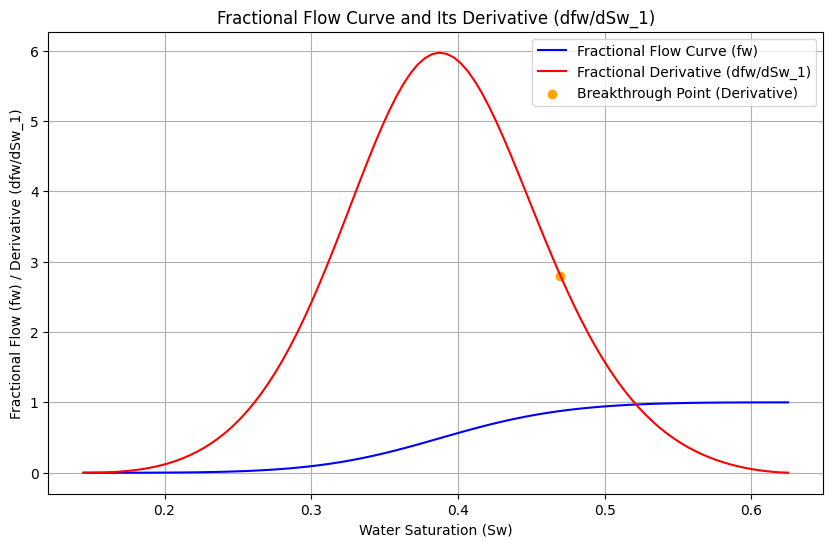

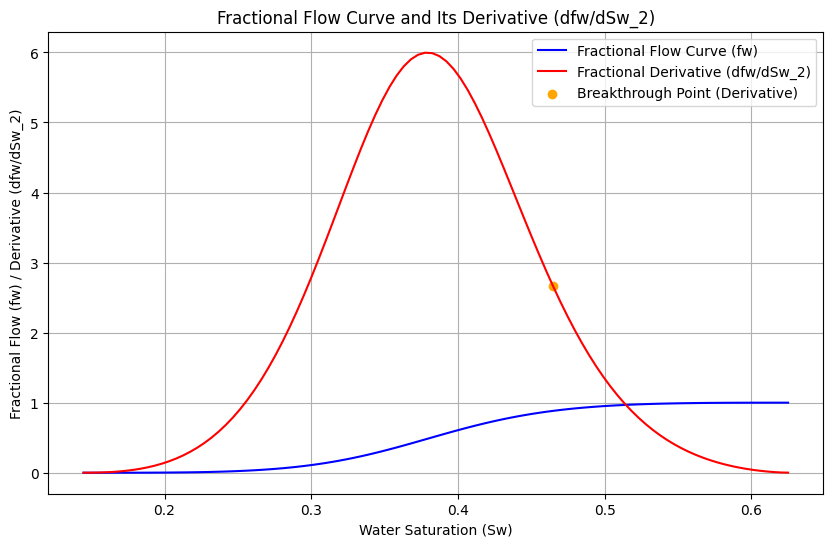

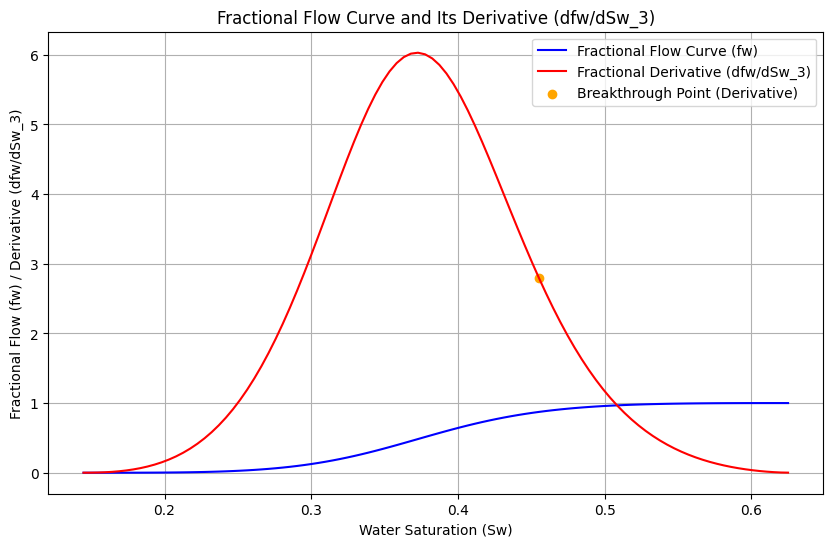

In [ ]:
# Step 10: Calculation and Visualization of the Fractional Derivative (dfw/dSw)

# Calculate the fractional derivative of the fractional flow curve with respect to Sw
d_fw_d_Sw_1_ng = np.gradient(fw_no_gravity_1, S_w)  # Derivative of fw with respect to Sw
d_fw_d_Sw_2_ng = np.gradient(fw_no_gravity_2, S_w)
d_fw_d_Sw_3_ng = np.gradient(fw_no_gravity_3, S_w)

# Step 10 visualization: Plot the fractional flow curve and its derivative
plt.figure(figsize=(10, 6))
# Plot the fractional flow curve
plt.plot(S_w, fw_no_gravity_1, label='Fractional Flow Curve (fw)', color='b')
# Plot the derivative of the fractional flow curve
plt.plot(S_w, d_fw_d_Sw_1_ng, label='Fractional Derivative (dfw/dSw_1)', color='r')
# Mark the breakthrough point on the derivative plot as well
plt.scatter(S_w[breakthrough_idx_1_ng], d_fw_d_Sw_1_ng[breakthrough_idx_1_ng], color='orange', label='Breakthrough Point (Derivative)')
# Labels and legend
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw) / Derivative (dfw/dSw_1)')
plt.title('Fractional Flow Curve and Its Derivative (dfw/dSw_1)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10 visualization: Plot the fractional flow curve and its derivative
plt.figure(figsize=(10, 6))
plt.plot(S_w, fw_no_gravity_2, label='Fractional Flow Curve (fw)', color='b')
plt.plot(S_w, d_fw_d_Sw_2_ng, label='Fractional Derivative (dfw/dSw_2)', color='r')
plt.scatter(S_w[breakthrough_idx_2_ng], d_fw_d_Sw_2_ng[breakthrough_idx_2_ng], color='orange', label='Breakthrough Point (Derivative)')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw) / Derivative (dfw/dSw_2)')
plt.title('Fractional Flow Curve and Its Derivative (dfw/dSw_2)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10 visualization: Plot the fractional flow curve and its derivative
plt.figure(figsize=(10, 6))
plt.plot(S_w, fw_no_gravity_3, label='Fractional Flow Curve (fw)', color='b')
plt.plot(S_w, d_fw_d_Sw_3_ng, label='Fractional Derivative (dfw/dSw_3)', color='r')
plt.scatter(S_w[breakthrough_idx_3_ng], d_fw_d_Sw_3_ng[breakthrough_idx_3_ng], color='orange', label='Breakthrough Point (Derivative)')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw) / Derivative (dfw/dSw_3)')
plt.title('Fractional Flow Curve and Its Derivative (dfw/dSw_3)')
plt.legend()
plt.grid(True)
plt.show()



#Step 10.2: Define and Visualize the Fractional Derivative (With Gravity). For three viscosity cases.

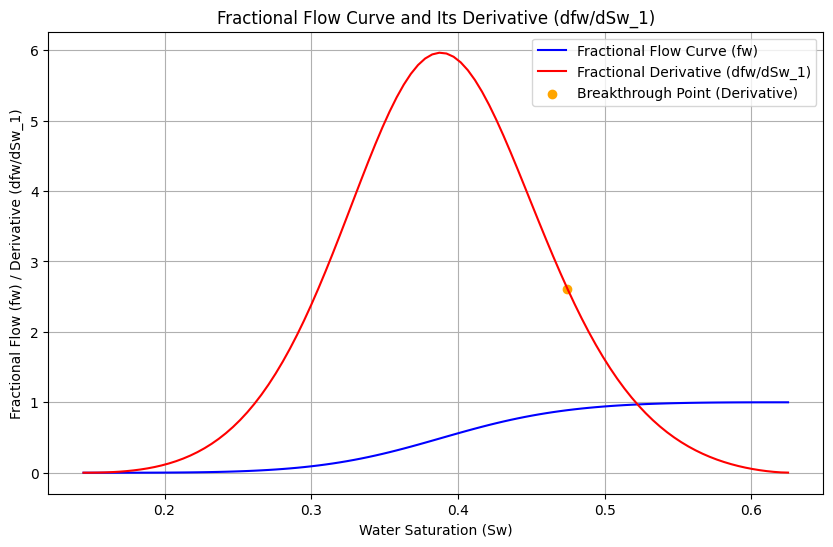

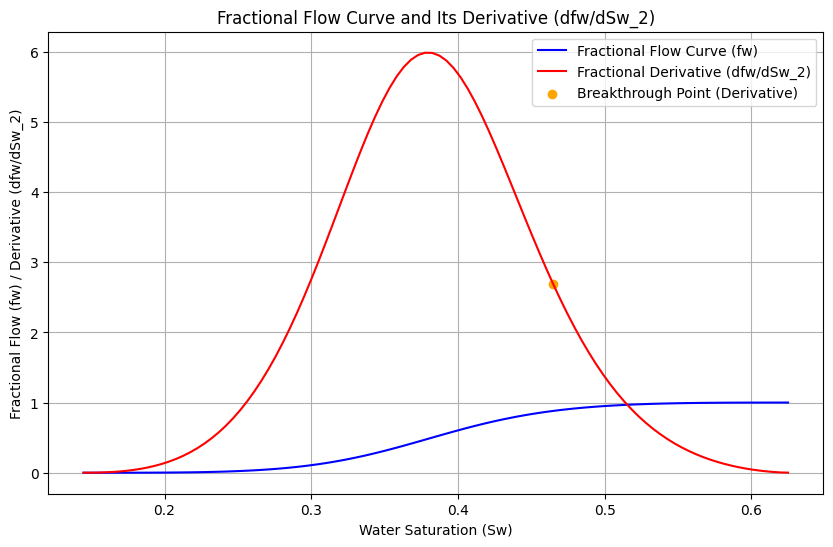

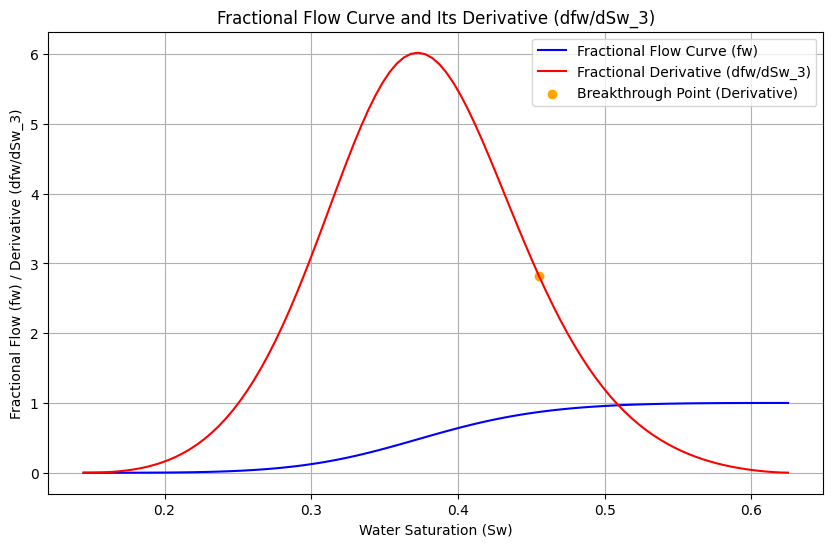

In [ ]:
# Step 10: Calculation and Visualization of the Fractional Derivative (dfw/dSw)

# Calculate the fractional derivative of the fractional flow curve with respect to Sw
d_fw_d_Sw_1_wg = np.gradient(fw_with_gravity_1, S_w)  # Derivative of fw with respect to Sw
d_fw_d_Sw_2_wg = np.gradient(fw_with_gravity_2, S_w)
d_fw_d_Sw_3_wg = np.gradient(fw_with_gravity_3, S_w)

# Step 10 visualization: Plot the fractional flow curve and its derivative
plt.figure(figsize=(10, 6))
# Plot the fractional flow curve
plt.plot(S_w, fw_with_gravity_1, label='Fractional Flow Curve (fw)', color='b')
# Plot the derivative of the fractional flow curve
plt.plot(S_w, d_fw_d_Sw_1_wg, label='Fractional Derivative (dfw/dSw_1)', color='r')
# Mark the breakthrough point on the derivative plot as well
plt.scatter(S_w[breakthrough_idx_1], d_fw_d_Sw_1_wg[breakthrough_idx_1], color='orange', label='Breakthrough Point (Derivative)')
# Labels and legend
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw) / Derivative (dfw/dSw_1)')
plt.title('Fractional Flow Curve and Its Derivative (dfw/dSw_1)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10 visualization: Plot the fractional flow curve and its derivative
plt.figure(figsize=(10, 6))
plt.plot(S_w, fw_with_gravity_2, label='Fractional Flow Curve (fw)', color='b')
plt.plot(S_w, d_fw_d_Sw_2_wg, label='Fractional Derivative (dfw/dSw_2)', color='r')
plt.scatter(S_w[breakthrough_idx_2], d_fw_d_Sw_2_wg[breakthrough_idx_2], color='orange', label='Breakthrough Point (Derivative)')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw) / Derivative (dfw/dSw_2)')
plt.title('Fractional Flow Curve and Its Derivative (dfw/dSw_2)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10 visualization: Plot the fractional flow curve and its derivative
plt.figure(figsize=(10, 6))
plt.plot(S_w, fw_with_gravity_3, label='Fractional Flow Curve (fw)', color='b')
plt.plot(S_w, d_fw_d_Sw_3_wg, label='Fractional Derivative (dfw/dSw_3)', color='r')
plt.scatter(S_w[breakthrough_idx_3], d_fw_d_Sw_3_wg[breakthrough_idx_3], color='orange', label='Breakthrough Point (Derivative)')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Fractional Flow (fw) / Derivative (dfw/dSw_3)')
plt.title('Fractional Flow Curve and Its Derivative (dfw/dSw_3)')
plt.legend()
plt.grid(True)
plt.show()



# Step 10.3 DataFrame

In [ ]:
# Assuming you have already calculated S_w, d_fw_d_Sw_1_wg, d_fw_d_Sw_2_wg, and d_fw_d_Sw_3_wg

# Create a DataFrame
df = pd.DataFrame({
    'Sw': S_w,
    'd_fw_d_Sw_1_ng': d_fw_d_Sw_1_ng,
    'd_fw_d_Sw_2_ng': d_fw_d_Sw_2_ng,
    'd_fw_d_Sw_3_ng': d_fw_d_Sw_3_ng,
    'd_fw_d_Sw_1_wg': d_fw_d_Sw_1_wg,
    'd_fw_d_Sw_2_wg': d_fw_d_Sw_2_wg,
    'd_fw_d_Sw_3_wg': d_fw_d_Sw_3_wg
})

df = pd.DataFrame(df)
# Display the results in a table
df

,Sw,d_fw_d_Sw_1_ng,d_fw_d_Sw_2_ng,d_fw_d_Sw_3_ng,d_fw_d_Sw_1_wg,d_fw_d_Sw_2_wg,d_fw_d_Sw_3_wg
0,0.144800,0.000105,0.000125,0.000146,0.000100,0.000120,0.000141
1,0.149651,0.000511,0.000611,0.000711,0.000487,0.000587,0.000687
2,0.154501,0.001908,0.002281,0.002653,0.001819,0.002193,0.002566
3,0.159352,0.004614,0.005516,0.006416,0.004405,0.005310,0.006212
4,0.164202,0.008907,0.010649,0.012387,0.008517,0.010264,0.012005
...,...,...,...,...,...,...,...
95,0.605598,0.034082,0.028509,0.024512,0.036229,0.030286,0.026024
96,0.610448,0.021283,0.017801,0.015305,0.022686,0.018963,0.016293
97,0.615299,0.011285,0.009439,0.008115,0.012063,0.010083,0.008663
98,0.620149,0.004213,0.003524,0.003029,0.004514,0.003773,0.003242


#Step 11: Calculating the Tangent Differential at the Breakthrough Point (No / With  Gravity)

In [ ]:
# Step 11: Calculating the differential for the tangent (yellow line) at the breakthrough point

# The slope of the tangent line has already been calculated in step 8 as "slope_tangent"
# So, we just need to create a table that includes the water saturation at the breakthrough point
# and the corresponding constant value of the tangent differential (slope_tangent).

# The water saturation at the breakthrough point is S_w[breakthrough_idx]
Sw_breakthrough_1_ng = S_w[breakthrough_idx_1_ng]
Sw_breakthrough_2_ng = S_w[breakthrough_idx_2_ng]
Sw_breakthrough_3_ng = S_w[breakthrough_idx_3_ng]
Sw_breakthrough_1_wg = S_w[breakthrough_idx_1]
Sw_breakthrough_2_wg = S_w[breakthrough_idx_2]
Sw_breakthrough_3_wg = S_w[breakthrough_idx_3]

# Tangent differential (constant value) is simply the slope of the tangent line
tangent_differential_1_ng = slope_tangent_1_ng
tangent_differential_2_ng = slope_tangent_2_ng
tangent_differential_3_ng = slope_tangent_3_ng
tangent_differential_1_wg = slope_tangent_1
tangent_differential_2_wg = slope_tangent_2
tangent_differential_3_wg = slope_tangent_3

# Creating a table to show the breakthrough water saturation and the tangent differential
tangent_diff_data = {
    'Viscosity Label': ['For Viscosity #1 (NO gravity)', 'For Viscosity #2 (NO gravity)', 'For Viscosity #3 (NO gravity)', 'For Viscosity #1 (WITH gravity)', 'For Viscosity #2 (WITH gravity)', 'For Viscosity #3 (WITH gravity)'],
    'Water Saturation at Breakthrough (Sw)': [Sw_breakthrough_1_ng, Sw_breakthrough_2_ng, Sw_breakthrough_3_ng, Sw_breakthrough_1_wg, Sw_breakthrough_2_wg, Sw_breakthrough_3_wg],
    'Tangent Differential (df_tangent/dSw)': [tangent_differential_1_ng, tangent_differential_2_ng, tangent_differential_3_ng, tangent_differential_1_wg, tangent_differential_2_wg, tangent_differential_3_wg]
}

df_tangent_diff = pd.DataFrame(tangent_diff_data)

# Display the results in a table
df_tangent_diff

,Viscosity Label,Water Saturation at Breakthrough (Sw),Tangent Differential (df_tangent/dSw)
0,For Viscosity #1 (NO gravity),0.469784,2.700835
1,For Viscosity #2 (NO gravity),0.464933,2.759123
2,For Viscosity #3 (NO gravity),0.455232,2.812280
3,For Viscosity #1 (WITH gravity),0.474634,2.693180
4,For Viscosity #2 (WITH gravity),0.464933,2.751737
5,For Viscosity #3 (WITH gravity),0.455232,2.804861


# Step 12.1 (No gravity)

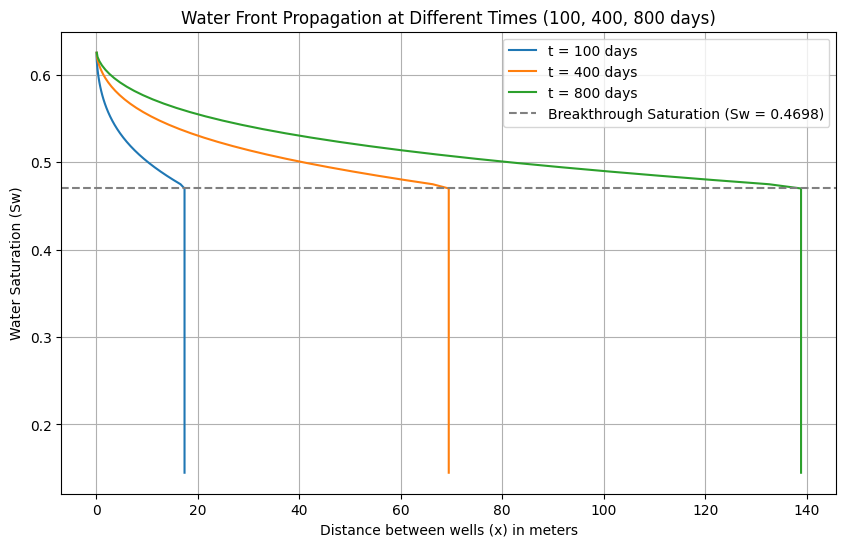

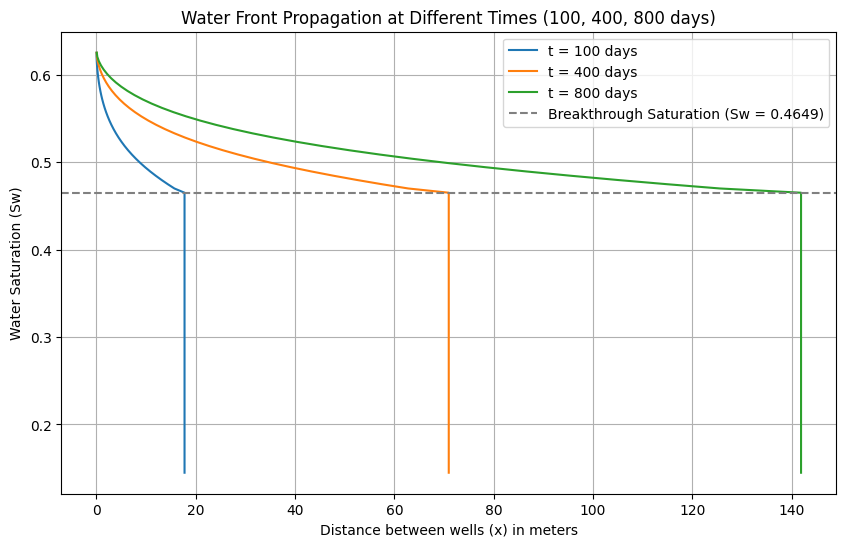

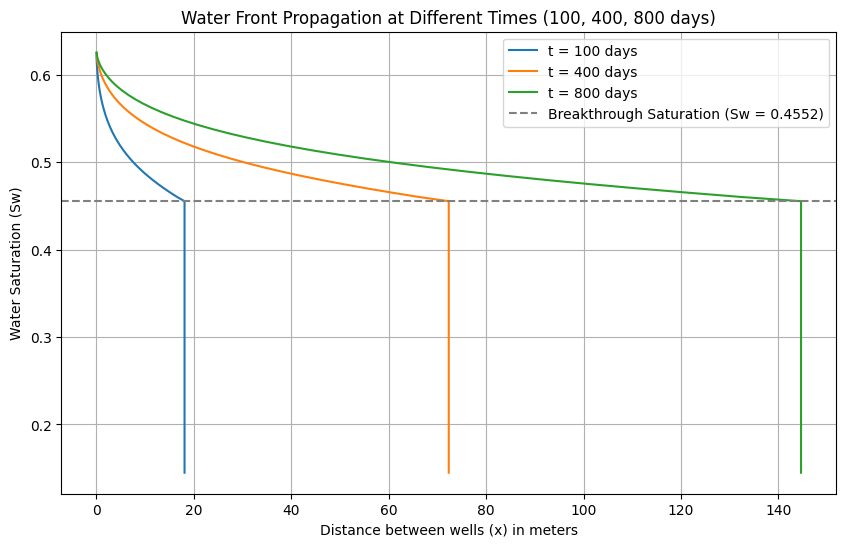

In [ ]:
# Step 12: Updated to calculate for water saturation points above the breakthrough point using d_fw_d_Sw

# Time values (in days)
times = [100, 400, 800]

# FOR VISCOSITY №1
# Calculate the distance of the water front for all saturation points below breakthrough (using tangent differential)
x_values_per_time_below_1_ng = []
for t in times:
    x_values_below_1_ng = []
    for Sw in S_w[:breakthrough_idx_1_ng+1]:  # Loop through water saturation points below breakthrough
        # Calculate the distance of the water front using the tangent differential
        x_ft_below_1_ng = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * tangent_differential_1_ng  # Distance in ft
        x_values_below_1_ng.append(x_ft_below_1_ng)
    # Convert to meters for plotting
    x_values_meters_below_1_ng = [x / 3.281 for x in x_values_below_1_ng]
    x_values_per_time_below_1_ng.append(x_values_meters_below_1_ng)

# Now calculate for saturation points above the breakthrough using d_fw_d_Sw_1 from Step 10
x_values_per_time_above_1_ng = []
for t in times:
    x_values_above_1_ng = []
    for i, Sw in enumerate(S_w[breakthrough_idx_1_ng+1:], start=breakthrough_idx_1_ng+1):  # Loop through water saturation points above breakthrough
        # Use d_fw_d_Sw for the corresponding saturation
        dfw_dSw_1_ng = d_fw_d_Sw_1_ng[i]  # Get the differential from Step 10
        # Calculate the distance of the water front using the formula
        x_ft_above_1_ng = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * dfw_dSw_1_ng  # Distance in ft
        x_values_above_1_ng.append(x_ft_above_1_ng)
    # Convert to meters for plotting
    x_values_meters_above_1_ng = [x / 3.281 for x in x_values_above_1_ng]
    x_values_per_time_above_1_ng.append(x_values_meters_above_1_ng)

# FOR VISCOSITY №2
# Calculate the distance of the water front for all saturation points below breakthrough (using tangent differential)
x_values_per_time_below_2_ng = []
for t in times:
    x_values_below_2_ng = []
    for Sw in S_w[:breakthrough_idx_2_ng+1]:  # Loop through water saturation points below breakthrough
        # Calculate the distance of the water front using the tangent differential
        x_ft_below_2_ng = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * tangent_differential_2_ng  # Distance in ft
        x_values_below_2_ng.append(x_ft_below_2_ng)
    # Convert to meters for plotting
    x_values_meters_below_2_ng = [x / 3.281 for x in x_values_below_2_ng]
    x_values_per_time_below_2_ng.append(x_values_meters_below_2_ng)

# Now calculate for saturation points above the breakthrough using d_fw_d_Sw_2 from Step 10
x_values_per_time_above_2_ng = []
for t in times:
    x_values_above_2_ng = []
    for i, Sw in enumerate(S_w[breakthrough_idx_2_ng+1:], start=breakthrough_idx_2_ng+1):  # Loop through water saturation points above breakthrough
        # Use d_fw_d_Sw for the corresponding saturation
        dfw_dSw_2_ng = d_fw_d_Sw_2_ng[i]  # Get the differential from Step 10
        # Calculate the distance of the water front using the formula
        x_ft_above_2_ng = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * dfw_dSw_2_ng  # Distance in ft
        x_values_above_2_ng.append(x_ft_above_2_ng)
    # Convert to meters for plotting
    x_values_meters_above_2_ng = [x / 3.281 for x in x_values_above_2_ng]
    x_values_per_time_above_2_ng.append(x_values_meters_above_2_ng)

# FOR VISCOSITY №3
# Calculate the distance of the water front for all saturation points below breakthrough (using tangent differential)
x_values_per_time_below_3_ng = []
for t in times:
    x_values_below_3_ng = []
    for Sw in S_w[:breakthrough_idx_3_ng+1]:  # Loop through water saturation points below breakthrough
        # Calculate the distance of the water front using the tangent differential
        x_ft_below_3_ng = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * tangent_differential_3_ng  # Distance in ft
        x_values_below_3_ng.append(x_ft_below_3_ng)
    # Convert to meters for plotting
    x_values_meters_below_3_ng = [x / 3.281 for x in x_values_below_3_ng]
    x_values_per_time_below_3_ng.append(x_values_meters_below_3_ng)

# Now calculate for saturation points above the breakthrough using d_fw_d_Sw_3 from Step 10
x_values_per_time_above_3_ng = []
for t in times:
    x_values_above_3_ng = []
    for i, Sw in enumerate(S_w[breakthrough_idx_3_ng+1:], start=breakthrough_idx_3_ng+1):  # Loop through water saturation points above breakthrough
        # Use d_fw_d_Sw for the corresponding saturation
        dfw_dSw_3_ng = d_fw_d_Sw_3_ng[i]  # Get the differential from Step 10
        # Calculate the distance of the water front using the formula
        x_ft_above_3_ng = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * dfw_dSw_3_ng  # Distance in ft
        x_values_above_3_ng.append(x_ft_above_3_ng)
    # Convert to meters for plotting
    x_values_meters_above_3_ng = [x / 3.281 for x in x_values_above_3_ng]
    x_values_per_time_above_3_ng.append(x_values_meters_above_3_ng)



# Step 13: Updated graph with continuous lines for each time case (combining above and below breakthrough)

# FOR VISCOSITY №1
# Plotting the results for all water saturation points (below and above breakthrough) as continuous lines
plt.figure(figsize=(10, 6))
# Combine the below and above breakthrough points for each time case into one continuous line
for i, t in enumerate(times):
    # Combine the x-values (below and above breakthrough) and S_w values
    x_combined_1_ng = np.concatenate((x_values_per_time_below_1_ng[i], x_values_per_time_above_1_ng[i]))
    S_w_combined_1_ng = np.concatenate((S_w[:breakthrough_idx_1_ng+1], S_w[breakthrough_idx_1_ng+1:]))
    # Plot the combined line for each time case
    plt.plot(x_combined_1_ng, S_w_combined_1_ng, label=f't = {t} days')
# Marking the water breakthrough point (constant y-value at different x-values)
plt.axhline(y=Sw_breakthrough_1_ng, color='gray', linestyle='--', label=f'Breakthrough Saturation (Sw = {Sw_breakthrough_1_ng:.4f})')
# Set labels and title (remove the columns of numbers from the bottom)
plt.xlabel('Distance between wells (x) in meters')
plt.ylabel('Water Saturation (Sw)')
plt.title('Water Front Propagation at Different Times (100, 400, 800 days)')
plt.grid(True)
plt.legend()
plt.show()

# FOR VISCOSITY №2
# Plotting the results for all water saturation points (below and above breakthrough) as continuous lines
plt.figure(figsize=(10, 6))
# Combine the below and above breakthrough points for each time case into one continuous line
for i, t in enumerate(times):
    # Combine the x-values (below and above breakthrough) and S_w values
    x_combined_2_ng = np.concatenate((x_values_per_time_below_2_ng[i], x_values_per_time_above_2_ng[i]))
    S_w_combined_2_ng = np.concatenate((S_w[:breakthrough_idx_2_ng+1], S_w[breakthrough_idx_2_ng+1:]))
    # Plot the combined line for each time case
    plt.plot(x_combined_2_ng, S_w_combined_2_ng, label=f't = {t} days')
# Marking the water breakthrough point (constant y-value at different x-values)
plt.axhline(y=Sw_breakthrough_2_ng, color='gray', linestyle='--', label=f'Breakthrough Saturation (Sw = {Sw_breakthrough_2_ng:.4f})')
# Set labels and title (remove the columns of numbers from the bottom)
plt.xlabel('Distance between wells (x) in meters')
plt.ylabel('Water Saturation (Sw)')
plt.title('Water Front Propagation at Different Times (100, 400, 800 days)')
plt.grid(True)
plt.legend()
plt.show()

# FOR VISCOSITY №3
# Plotting the results for all water saturation points (below and above breakthrough) as continuous lines
plt.figure(figsize=(10, 6))
# Combine the below and above breakthrough points for each time case into one continuous line
for i, t in enumerate(times):
    # Combine the x-values (below and above breakthrough) and S_w values
    x_combined_3_ng = np.concatenate((x_values_per_time_below_3_ng[i], x_values_per_time_above_3_ng[i]))
    S_w_combined_3_ng = np.concatenate((S_w[:breakthrough_idx_3_ng+1], S_w[breakthrough_idx_3_ng+1:]))
    # Plot the combined line for each time case
    plt.plot(x_combined_3_ng, S_w_combined_3_ng, label=f't = {t} days')
# Marking the water breakthrough point (constant y-value at different x-values)
plt.axhline(y=Sw_breakthrough_3_ng, color='gray', linestyle='--', label=f'Breakthrough Saturation (Sw = {Sw_breakthrough_3_ng:.4f})')
# Set labels and title (remove the columns of numbers from the bottom)
plt.xlabel('Distance between wells (x) in meters')
plt.ylabel('Water Saturation (Sw)')
plt.title('Water Front Propagation at Different Times (100, 400, 800 days)')
plt.grid(True)
plt.legend()
plt.show()

# Step 12.2 (With gravity)

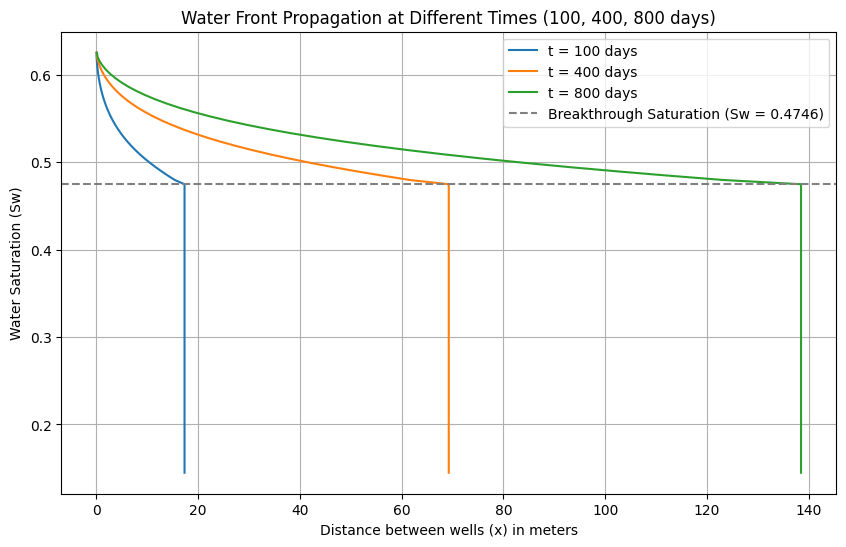

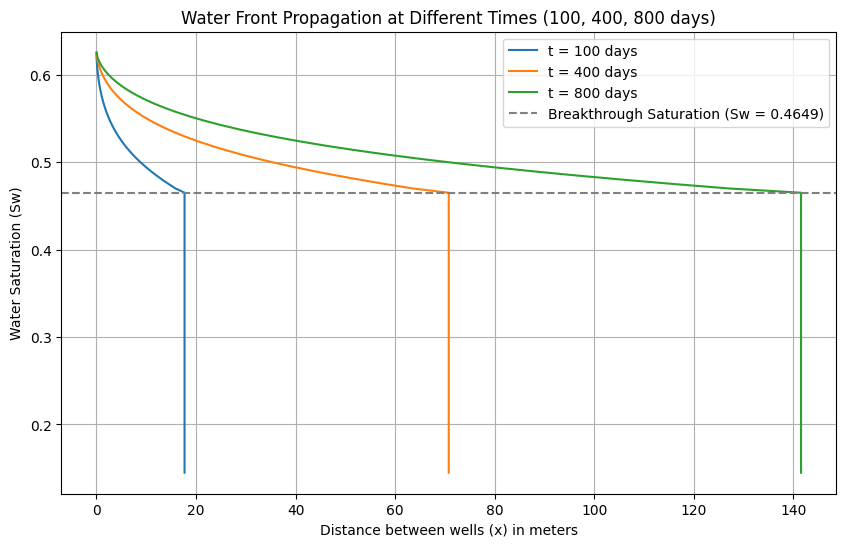

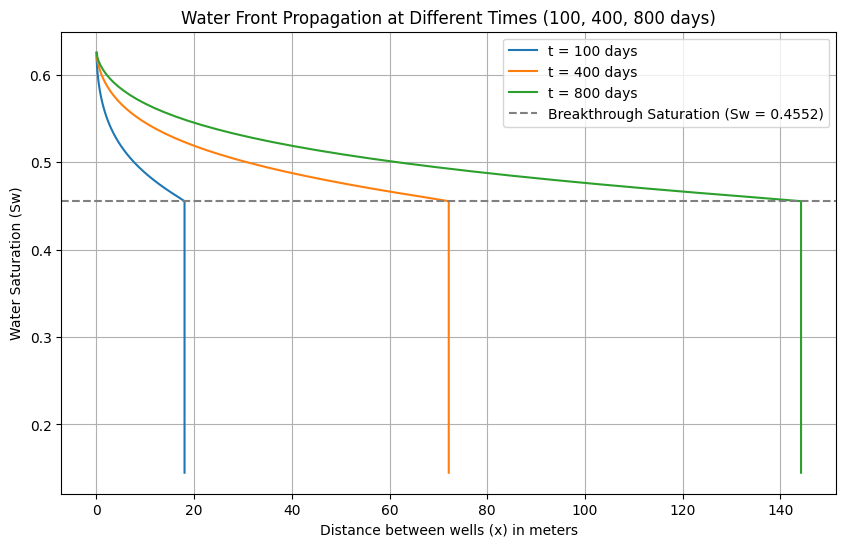

In [ ]:
# Step 12: Updated to calculate for water saturation points above the breakthrough point using d_fw_d_Sw

# Time values (in days)
times = [100, 400, 800]

# FOR VISCOSITY №1
# Calculate the distance of the water front for all saturation points below breakthrough (using tangent differential)
x_values_per_time_below_1_wg = []
for t in times:
    x_values_below_1_wg = []
    for Sw in S_w[:breakthrough_idx_1+1]:  # Loop through water saturation points below breakthrough
        # Calculate the distance of the water front using the tangent differential
        x_ft_below_1_wg = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * tangent_differential_1_wg  # Distance in ft
        x_values_below_1_wg.append(x_ft_below_1_wg)
    # Convert to meters for plotting
    x_values_meters_below_1_wg = [x / 3.281 for x in x_values_below_1_wg]
    x_values_per_time_below_1_wg.append(x_values_meters_below_1_wg)

# Now calculate for saturation points above the breakthrough using d_fw_d_Sw_1 from Step 10
x_values_per_time_above_1_wg = []
for t in times:
    x_values_above_1_wg = []
    for i, Sw in enumerate(S_w[breakthrough_idx_1+1:], start=breakthrough_idx_1+1):  # Loop through water saturation points above breakthrough
        # Use d_fw_d_Sw for the corresponding saturation
        dfw_dSw_1_wg = d_fw_d_Sw_1_wg[i]  # Get the differential from Step 10
        # Calculate the distance of the water front using the formula
        x_ft_above_1_wg = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * dfw_dSw_1_wg  # Distance in ft
        x_values_above_1_wg.append(x_ft_above_1_wg)
    # Convert to meters for plotting
    x_values_meters_above_1_wg = [x / 3.281 for x in x_values_above_1_wg]
    x_values_per_time_above_1_wg.append(x_values_meters_above_1_wg)

# FOR VISCOSITY №2
# Calculate the distance of the water front for all saturation points below breakthrough (using tangent differential)
x_values_per_time_below_2_wg = []
for t in times:
    x_values_below_2_wg = []
    for Sw in S_w[:breakthrough_idx_2+1]:  # Loop through water saturation points below breakthrough
        # Calculate the distance of the water front using the tangent differential
        x_ft_below_2_wg = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * tangent_differential_2_wg  # Distance in ft
        x_values_below_2_wg.append(x_ft_below_2_wg)
    # Convert to meters for plotting
    x_values_meters_below_2_wg = [x / 3.281 for x in x_values_below_2_wg]
    x_values_per_time_below_2_wg.append(x_values_meters_below_2_wg)

# Now calculate for saturation points above the breakthrough using d_fw_d_Sw_2 from Step 10
x_values_per_time_above_2_wg = []
for t in times:
    x_values_above_2_wg = []
    for i, Sw in enumerate(S_w[breakthrough_idx_2+1:], start=breakthrough_idx_2+1):  # Loop through water saturation points above breakthrough
        # Use d_fw_d_Sw for the corresponding saturation
        dfw_dSw_2_wg = d_fw_d_Sw_2_wg[i]  # Get the differential from Step 10
        # Calculate the distance of the water front using the formula
        x_ft_above_2_wg = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * dfw_dSw_2_wg  # Distance in ft
        x_values_above_2_wg.append(x_ft_above_2_wg)
    # Convert to meters for plotting
    x_values_meters_above_2_wg = [x / 3.281 for x in x_values_above_2_wg]
    x_values_per_time_above_2_wg.append(x_values_meters_above_2_wg)

# FOR VISCOSITY №3
# Calculate the distance of the water front for all saturation points below breakthrough (using tangent differential)
x_values_per_time_below_3_wg = []
for t in times:
    x_values_below_3_wg = []
    for Sw in S_w[:breakthrough_idx_3+1]:  # Loop through water saturation points below breakthrough
        # Calculate the distance of the water front using the tangent differential
        x_ft_below_3_wg = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * tangent_differential_3_wg  # Distance in ft
        x_values_below_3_wg.append(x_ft_below_3_wg)
    # Convert to meters for plotting
    x_values_meters_below_3_wg = [x / 3.281 for x in x_values_below_3_wg]
    x_values_per_time_below_3_wg.append(x_values_meters_below_3_wg)

# Now calculate for saturation points above the breakthrough using d_fw_d_Sw_3 from Step 10
x_values_per_time_above_3_wg = []
for t in times:
    x_values_above_3_wg = []
    for i, Sw in enumerate(S_w[breakthrough_idx_3+1:], start=breakthrough_idx_3+1):  # Loop through water saturation points above breakthrough
        # Use d_fw_d_Sw for the corresponding saturation
        dfw_dSw_3_wg = d_fw_d_Sw_3_wg[i]  # Get the differential from Step 10
        # Calculate the distance of the water front using the formula
        x_ft_above_3_wg = (5.615 * i_w_bbl_per_day * t) / (phi * A_ft2) * dfw_dSw_3_wg  # Distance in ft
        x_values_above_3_wg.append(x_ft_above_3_wg)
    # Convert to meters for plotting
    x_values_meters_above_3_wg = [x / 3.281 for x in x_values_above_3_wg]
    x_values_per_time_above_3_wg.append(x_values_meters_above_3_wg)



# Step 13: Updated graph with continuous lines for each time case (combining above and below breakthrough)

# FOR VISCOSITY №1
# Plotting the results for all water saturation points (below and above breakthrough) as continuous lines
plt.figure(figsize=(10, 6))
# Combine the below and above breakthrough points for each time case into one continuous line
for i, t in enumerate(times):
    # Combine the x-values (below and above breakthrough) and S_w values
    x_combined_1_wg = np.concatenate((x_values_per_time_below_1_wg[i], x_values_per_time_above_1_wg[i]))
    S_w_combined_1_wg = np.concatenate((S_w[:breakthrough_idx_1+1], S_w[breakthrough_idx_1+1:]))
    # Plot the combined line for each time case
    plt.plot(x_combined_1_wg, S_w_combined_1_wg, label=f't = {t} days')
# Marking the water breakthrough point (constant y-value at different x-values)
plt.axhline(y=Sw_breakthrough_1_wg, color='gray', linestyle='--', label=f'Breakthrough Saturation (Sw = {Sw_breakthrough_1_wg:.4f})')
# Set labels and title (remove the columns of numbers from the bottom)
plt.xlabel('Distance between wells (x) in meters')
plt.ylabel('Water Saturation (Sw)')
plt.title('Water Front Propagation at Different Times (100, 400, 800 days)')
plt.grid(True)
plt.legend()
plt.show()

# FOR VISCOSITY №2
# Plotting the results for all water saturation points (below and above breakthrough) as continuous lines
plt.figure(figsize=(10, 6))
# Combine the below and above breakthrough points for each time case into one continuous line
for i, t in enumerate(times):
    # Combine the x-values (below and above breakthrough) and S_w values
    x_combined_2_wg = np.concatenate((x_values_per_time_below_2_wg[i], x_values_per_time_above_2_wg[i]))
    S_w_combined_2_wg = np.concatenate((S_w[:breakthrough_idx_2+1], S_w[breakthrough_idx_2+1:]))
    # Plot the combined line for each time case
    plt.plot(x_combined_2_wg, S_w_combined_2_wg, label=f't = {t} days')
# Marking the water breakthrough point (constant y-value at different x-values)
plt.axhline(y=Sw_breakthrough_2_wg, color='gray', linestyle='--', label=f'Breakthrough Saturation (Sw = {Sw_breakthrough_2_wg:.4f})')
# Set labels and title (remove the columns of numbers from the bottom)
plt.xlabel('Distance between wells (x) in meters')
plt.ylabel('Water Saturation (Sw)')
plt.title('Water Front Propagation at Different Times (100, 400, 800 days)')
plt.grid(True)
plt.legend()
plt.show()

# FOR VISCOSITY №3
# Plotting the results for all water saturation points (below and above breakthrough) as continuous lines
plt.figure(figsize=(10, 6))
# Combine the below and above breakthrough points for each time case into one continuous line
for i, t in enumerate(times):
    # Combine the x-values (below and above breakthrough) and S_w values
    x_combined_3_wg = np.concatenate((x_values_per_time_below_3_wg[i], x_values_per_time_above_3_wg[i]))
    S_w_combined_3_wg = np.concatenate((S_w[:breakthrough_idx_3+1], S_w[breakthrough_idx_3+1:]))
    # Plot the combined line for each time case
    plt.plot(x_combined_3_wg, S_w_combined_3_wg, label=f't = {t} days')
# Marking the water breakthrough point (constant y-value at different x-values)
plt.axhline(y=Sw_breakthrough_3_wg, color='gray', linestyle='--', label=f'Breakthrough Saturation (Sw = {Sw_breakthrough_3_wg:.4f})')
# Set labels and title (remove the columns of numbers from the bottom)
plt.xlabel('Distance between wells (x) in meters')
plt.ylabel('Water Saturation (Sw)')
plt.title('Water Front Propagation at Different Times (100, 400, 800 days)')
plt.grid(True)
plt.legend()
plt.show()


# Step 14.1: Output a table (NO GRAVITY) with Water Saturation and corresponding distances (m) for 3 different time cases (100, 400, 800 days), for 3 different viscosity cases

In [ ]:
# Create a DataFrame with water saturation and the distances for each time case
distance_data_1 = {
    'Water Saturation (Sw)': np.concatenate((S_w[:breakthrough_idx_1+1], S_w[breakthrough_idx_1+1:])),  # Combine water saturations
    'VISCOSITY №1 Dist(m) (t=100d)': np.concatenate((x_values_per_time_below_1_ng[0], x_values_per_time_above_1_ng[0])),  # Combine distances for t = 100 days
    'VISCOSITY №1 Dist(m) (t=400d)': np.concatenate((x_values_per_time_below_1_ng[1], x_values_per_time_above_1_ng[1])),  # Combine distances for t = 400 days
    'VISCOSITY №1 Dist(m) (t=800d)': np.concatenate((x_values_per_time_below_1_ng[2], x_values_per_time_above_1_ng[2])),  # Combine distances for t = 800 days

    'VISCOSITY №2 Dist(m) (t=100d)': np.concatenate((x_values_per_time_below_2_ng[0], x_values_per_time_above_2_ng[0])),  # Combine distances for t = 100 days
    'VISCOSITY №2 Dist(m) (t=400d)': np.concatenate((x_values_per_time_below_2_ng[1], x_values_per_time_above_2_ng[1])),  # Combine distances for t = 400 days
    'VISCOSITY №2 Dist(m) (t=800d)': np.concatenate((x_values_per_time_below_2_ng[2], x_values_per_time_above_2_ng[2])),  # Combine distances for t = 800 days

    'VISCOSITY №3 Dist(m) (t=100d)': np.concatenate((x_values_per_time_below_3_ng[0], x_values_per_time_above_3_ng[0])),  # Combine distances for t = 100 days
    'VISCOSITY №3 Dist(m) (t=400d)': np.concatenate((x_values_per_time_below_3_ng[1], x_values_per_time_above_3_ng[1])),  # Combine distances for t = 400 days
    'VISCOSITY №3 Dist(m) (t=800d)': np.concatenate((x_values_per_time_below_3_ng[2], x_values_per_time_above_3_ng[2]))   # Combine distances for t = 800 days
}
# Create a pandas DataFrame
df_distance_1 = pd.DataFrame(distance_data_1)
# Display the table
df_distance_1.head(100)  # Display the first 100 rows


,Water Saturation (Sw),VISCOSITY №1 Dist(m) (t=100d),VISCOSITY №1 Dist(m) (t=400d),VISCOSITY №1 Dist(m) (t=800d),VISCOSITY №2 Dist(m) (t=100d),VISCOSITY №2 Dist(m) (t=400d),VISCOSITY №2 Dist(m) (t=800d),VISCOSITY №3 Dist(m) (t=100d),VISCOSITY №3 Dist(m) (t=400d),VISCOSITY №3 Dist(m) (t=800d)
0,0.144800,17.363442,69.453768,138.907536,17.738173,70.952691,141.905383,18.079913,72.319653,144.639305
1,0.149651,17.363442,69.453768,138.907536,17.738173,70.952691,141.905383,18.079913,72.319653,144.639305
2,0.154501,17.363442,69.453768,138.907536,17.738173,70.952691,141.905383,18.079913,72.319653,144.639305
3,0.159352,17.363442,69.453768,138.907536,17.738173,70.952691,141.905383,18.079913,72.319653,144.639305
4,0.164202,17.363442,69.453768,138.907536,17.738173,70.952691,141.905383,18.079913,72.319653,144.639305
...,...,...,...,...,...,...,...,...,...,...
95,0.605598,0.219109,0.876438,1.752876,0.183279,0.733118,1.466235,0.157583,0.630332,1.260664
96,0.610448,0.136824,0.547294,1.094588,0.114444,0.457777,0.915554,0.098396,0.393582,0.787164
97,0.615299,0.072553,0.290213,0.580426,0.060685,0.242738,0.485476,0.052174,0.208694,0.417389
98,0.620149,0.027084,0.108334,0.216669,0.022653,0.090611,0.181222,0.019476,0.077902,0.155805


# Step 14.2: Output a table (WITH GRAVITY) with Water Saturation and corresponding distances (m) for 3 different time cases (100, 400, 800 days), for 3 different viscosity cases

In [ ]:
# Create a DataFrame with water saturation and the distances for each time case
distance_data_1 = {
    'Water Saturation (Sw)': np.concatenate((S_w[:breakthrough_idx_1+1], S_w[breakthrough_idx_1+1:])),  # Combine water saturations
    'VISCOSITY №1 Dist(m) (t=100d)': np.concatenate((x_values_per_time_below_1_wg[0], x_values_per_time_above_1_wg[0])),  # Combine distances for t = 100 days
    'VISCOSITY №1 Dist(m) (t=400d)': np.concatenate((x_values_per_time_below_1_wg[1], x_values_per_time_above_1_wg[1])),  # Combine distances for t = 400 days
    'VISCOSITY №1 Dist(m) (t=800d)': np.concatenate((x_values_per_time_below_1_wg[2], x_values_per_time_above_1_wg[2])),  # Combine distances for t = 800 days

    'VISCOSITY №2 Dist(m) (t=100d)': np.concatenate((x_values_per_time_below_2_wg[0], x_values_per_time_above_2_wg[0])),  # Combine distances for t = 100 days
    'VISCOSITY №2 Dist(m) (t=400d)': np.concatenate((x_values_per_time_below_2_wg[1], x_values_per_time_above_2_wg[1])),  # Combine distances for t = 400 days
    'VISCOSITY №2 Dist(m) (t=800d)': np.concatenate((x_values_per_time_below_2_wg[2], x_values_per_time_above_2_wg[2])),  # Combine distances for t = 800 days

    'VISCOSITY №3 Dist(m) (t=100d)': np.concatenate((x_values_per_time_below_3_wg[0], x_values_per_time_above_3_wg[0])),  # Combine distances for t = 100 days
    'VISCOSITY №3 Dist(m) (t=400d)': np.concatenate((x_values_per_time_below_3_wg[1], x_values_per_time_above_3_wg[1])),  # Combine distances for t = 400 days
    'VISCOSITY №3 Dist(m) (t=800d)': np.concatenate((x_values_per_time_below_3_wg[2], x_values_per_time_above_3_wg[2]))   # Combine distances for t = 800 days
}
# Create a pandas DataFrame
df_distance_1 = pd.DataFrame(distance_data_1)
# Display the table
df_distance_1.head(100)  # Display the first 100 rows


,Water Saturation (Sw),VISCOSITY №1 Dist(m) (t=100d),VISCOSITY №1 Dist(m) (t=400d),VISCOSITY №1 Dist(m) (t=800d),VISCOSITY №2 Dist(m) (t=100d),VISCOSITY №2 Dist(m) (t=400d),VISCOSITY №2 Dist(m) (t=800d),VISCOSITY №3 Dist(m) (t=100d),VISCOSITY №3 Dist(m) (t=400d),VISCOSITY №3 Dist(m) (t=800d)
0,0.144800,17.314226,69.256903,138.513806,17.690684,70.762734,141.525468,18.032215,72.128860,144.257721
1,0.149651,17.314226,69.256903,138.513806,17.690684,70.762734,141.525468,18.032215,72.128860,144.257721
2,0.154501,17.314226,69.256903,138.513806,17.690684,70.762734,141.525468,18.032215,72.128860,144.257721
3,0.159352,17.314226,69.256903,138.513806,17.690684,70.762734,141.525468,18.032215,72.128860,144.257721
4,0.164202,17.314226,69.256903,138.513806,17.690684,70.762734,141.525468,18.032215,72.128860,144.257721
...,...,...,...,...,...,...,...,...,...,...
95,0.605598,0.232916,0.931665,1.863331,0.194707,0.778829,1.557658,0.167304,0.669217,1.338434
96,0.610448,0.145848,0.583393,1.166787,0.121914,0.487654,0.975309,0.104749,0.418997,0.837994
97,0.615299,0.077552,0.310207,0.620415,0.064822,0.259286,0.518572,0.055693,0.222771,0.445541
98,0.620149,0.029022,0.116088,0.232176,0.024257,0.097028,0.194057,0.020840,0.083361,0.166722


#Step 15. All parametres at the Breakthrough (tBT) with and without gravity, 3 viscosity
---



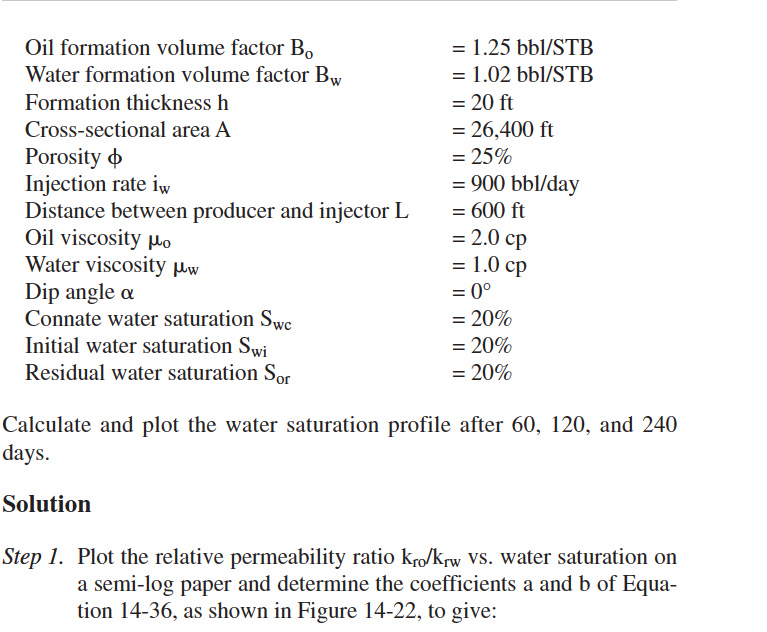

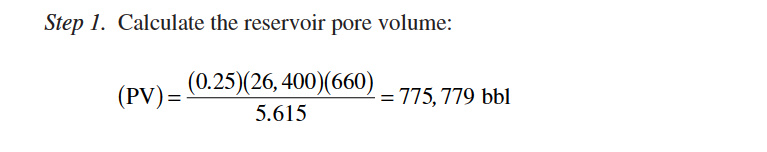

In [ ]:
# Step 15: Calculate Pore Volume (PV)
PV_bbl = (phi * A_ft2 * L_ft) / 5.615  # Pore volume in bbl
PV_m3 = PV_bbl * conversion_factor_bbl_to_m3  # Convert PV to m³
Ns_STB = 7758 * A_acre * L_ft * phi * (1 - Swi) / Bo  # initial oil in place in STB

# cumulative oil production at Breakthrough , STB
Np_BT_STB_1_ng = Ns_STB * Ed_BT_1_ng
Np_BT_STB_2_ng = Ns_STB * Ed_BT_2_ng
Np_BT_STB_3_ng = Ns_STB * Ed_BT_3_ng
Np_BT_STB_1_wg = Ns_STB * Ed_BT_1_wg
Np_BT_STB_2_wg = Ns_STB * Ed_BT_2_wg
Np_BT_STB_3_wg = Ns_STB * Ed_BT_3_wg

#  Calculate Time to Breakthrough (tBT), days
tBT_days_1_ng = PV_bbl / (i_w_bbl_per_day * tangent_differential_1_ng)
tBT_days_2_ng = PV_bbl / (i_w_bbl_per_day * tangent_differential_2_ng)
tBT_days_3_ng = PV_bbl / (i_w_bbl_per_day * tangent_differential_3_ng)
tBT_days_1_wg = PV_bbl / (i_w_bbl_per_day * tangent_differential_1_wg)
tBT_days_2_wg = PV_bbl / (i_w_bbl_per_day * tangent_differential_2_wg)
tBT_days_3_wg = PV_bbl / (i_w_bbl_per_day * tangent_differential_3_wg)

#  Calculate Cumulative Water Injected at Breakthrough (WiBT), bbl
WiBT_bbl_1_ng = i_w_bbl_per_day * tBT_days_1_ng
WiBT_bbl_2_ng = i_w_bbl_per_day * tBT_days_2_ng
WiBT_bbl_3_ng = i_w_bbl_per_day * tBT_days_3_ng
WiBT_bbl_1_wg = i_w_bbl_per_day * tBT_days_1_wg
WiBT_bbl_2_wg = i_w_bbl_per_day * tBT_days_2_wg
WiBT_bbl_3_wg = i_w_bbl_per_day * tBT_days_3_wg

WiBT_m3_1_ng = WiBT_bbl_1_ng * conversion_factor_bbl_to_m3  # Convert WiBT to m³
WiBT_m3_2_ng = WiBT_bbl_2_ng * conversion_factor_bbl_to_m3
WiBT_m3_3_ng = WiBT_bbl_3_ng * conversion_factor_bbl_to_m3
WiBT_m3_1_wg = WiBT_bbl_1_wg * conversion_factor_bbl_to_m3  # Convert WiBT to m³
WiBT_m3_2_wg = WiBT_bbl_2_wg * conversion_factor_bbl_to_m3
WiBT_m3_3_wg = WiBT_bbl_3_wg * conversion_factor_bbl_to_m3


# Calculate Cumulative Pore Volumes of Water Injected at Breakthrough (QiBT)
QiBT_1_ng = 1 / tangent_differential_1_ng
QiBT_2_ng = 1 / tangent_differential_2_ng
QiBT_3_ng = 1 / tangent_differential_3_ng
QiBT_1_wg = 1 / tangent_differential_1_wg
QiBT_2_wg = 1 / tangent_differential_2_wg
QiBT_3_wg = 1 / tangent_differential_3_wg

# Calculate WORs exactly at breakthrough by applying Equation
WORs_BT_1_ng = Bo / (Bw * (1 / fw_no_gravity_1[breakthrough_idx_1_ng] - 1))
WORs_BT_2_ng = Bo / (Bw * (1 / fw_no_gravity_2[breakthrough_idx_2_ng] - 1))
WORs_BT_3_ng = Bo / (Bw * (1 / fw_no_gravity_3[breakthrough_idx_3_ng] - 1))
WORs_BT_1_wg = Bo / (Bw * (1 / fw_with_gravity_1[breakthrough_idx_1] - 1))
WORs_BT_2_wg = Bo / (Bw * (1 / fw_with_gravity_2[breakthrough_idx_2] - 1))
WORs_BT_3_wg = Bo / (Bw * (1 / fw_with_gravity_3[breakthrough_idx_3] - 1))

# Output results in a table format
results_data = {
    "Parameter": ["Pore Volume (PV)", "Ns_STB", "Cumulative oil production at Breakthrough (NO gravity) №1 (NpBT_1)", "Cumulative oil production at Breakthrough (NO gravity) №2 (NpBT_2)", "Cumulative oil production at Breakthrough (NO gravity) №3 (NpBT_3)",
                  "Cumulative oil production at Breakthrough (WITH gravity) №1 (NpBT_1)", "Cumulative oil production at Breakthrough (WITH gravity) №2 (NpBT_2)", "Cumulative oil production at Breakthrough (WITH gravity) №3 (NpBT_3)",
                  "Time to Breakthrough (NO gravity) №1 (tBT_1)", "Time to Breakthrough (NO gravity) №2 (tBT_2)", "Time to Breakthrough (NO gravity) №3 (tBT_3)",
                  "Time to Breakthrough (WITH gravity) №1 (tBT_1)", "Time to Breakthrough (WITH gravity) №2 (tBT_2)", "Time to Breakthrough (WITH gravity) №3 (tBT_3)",
                  "Cumulative Water Injected at Breakthrough (NO gravity) №1 (WiBT_1)", "Cumulative Water Injected at Breakthrough (NO gravity) №2 (WiBT_2)", "Cumulative Water Injected at Breakthrough (NO gravity) №3 (WiBT_3)",
                  "Cumulative Water Injected at Breakthrough (WITH gravity) №1 (WiBT_1)", "Cumulative Water Injected at Breakthrough (WITH gravity) №2 (WiBT_2)", "Cumulative Water Injected at Breakthrough (WITH gravity) №3 (WiBT_3)",
                  "Cumulative Pore Volumes at Breakthrough (NO gravity) №1 (QiBT_1)", "Cumulative Pore Volumes at Breakthrough (NO gravity) №2 (QiBT_2)", "Cumulative Pore Volumes at Breakthrough (NO gravity) №3 (QiBT_3)",
                  "Cumulative Pore Volumes at Breakthrough (WITH gravity) №1 (QiBT_1)", "Cumulative Pore Volumes at Breakthrough (WITH gravity) №2 (QiBT_2)", "Cumulative Pore Volumes at Breakthrough (WITH gravity) №3 (QiBT_3)",
                  "WORs_BT_1_ng", "WORs_BT_2_ng", "WORs_BT_3_ng", "WORs_BT_1_wg", "WORs_BT_2_wg", "WORs_BT_3_wg"],
    "Value (bbl)": [PV_bbl, Ns_STB, Np_BT_STB_1_ng, Np_BT_STB_2_ng, Np_BT_STB_3_ng, Np_BT_STB_1_wg, Np_BT_STB_2_wg, Np_BT_STB_3_wg, tBT_days_1_ng, tBT_days_2_ng, tBT_days_3_ng, tBT_days_1_wg, tBT_days_2_wg, tBT_days_3_wg,
                    WiBT_bbl_1_ng, WiBT_bbl_2_ng, WiBT_bbl_3_ng, WiBT_bbl_1_wg, WiBT_bbl_2_wg, WiBT_bbl_3_wg,
                    QiBT_1_ng, QiBT_2_ng, QiBT_3_ng, QiBT_1_wg, QiBT_2_wg, QiBT_3_wg,
                    WORs_BT_1_ng, WORs_BT_2_ng, WORs_BT_3_ng, WORs_BT_1_wg, WORs_BT_2_wg, WORs_BT_3_wg],
    "Value (m³)": [PV_m3, None, None, None, None, None, None, None, None, None, None, None, None, None, WiBT_m3_1_ng, WiBT_m3_2_ng, WiBT_m3_3_ng, WiBT_m3_1_wg, WiBT_m3_2_wg, WiBT_m3_3_wg, None, None, None, None, None, None, None, None, None, None, None, None],  # None for non-applicable conversions
    "Units": ["bbl/m³", "STB", "STB", "STB", "STB", "STB", "STB", "STB", "days", "days", "days", "days", "days", "days", "bbl/m³", "bbl/m³", "bbl/m³", "bbl/m³", "bbl/m³", "bbl/m³", "pore volumes", "pore volumes", "pore volumes", "pore volumes", "pore volumes", "pore volumes",
              "STB/STB", "STB/STB", "STB/STB", "STB/STB", "STB/STB", "STB/STB"]
}
# Create DataFrame
df_results = pd.DataFrame(results_data)
# Display the results
df_results

,Parameter,Value (bbl),Value (m³),Units
0,Pore Volume (PV),2.749031e+06,437060.170285,bbl/m³
1,Ns_STB,1.959197e+06,NaN,STB
2,Cumulative oil production at Breakthrough (NO ...,8.482277e+05,NaN,STB
3,Cumulative oil production at Breakthrough (NO ...,8.303083e+05,NaN,STB
4,Cumulative oil production at Breakthrough (NO ...,8.146141e+05,NaN,STB
5,Cumulative oil production at Breakthrough (WIT...,8.506388e+05,NaN,STB
6,Cumulative oil production at Breakthrough (WIT...,8.325372e+05,NaN,STB
7,Cumulative oil production at Breakthrough (WIT...,8.167689e+05,NaN,STB
8,Time to Breakthrough (NO gravity) №1 (tBT_1),3.236488e+03,NaN,days
9,Time to Breakthrough (NO gravity) №2 (tBT_2),3.168115e+03,NaN,days


# Verefication Np

In [ ]:
Np_BT_STB_1_ng_v = WiBT_bbl_1_ng / Bo
Np_BT_STB_2_ng_v = WiBT_bbl_2_ng / Bo
Np_BT_STB_3_ng_v = WiBT_bbl_3_ng / Bo
Np_BT_STB_1_wg_v = WiBT_bbl_1_wg / Bo
Np_BT_STB_2_wg_v = WiBT_bbl_2_wg / Bo
Np_BT_STB_3_wg_v = WiBT_bbl_3_wg / Bo

# Creating a table to show the breakthrough water saturation and the tangent differential
tangent_diff_data = {
    'Label': ['For Viscosity #1 (NO gravity)', 'For Viscosity #2 (NO gravity)', 'For Viscosity #3 (NO gravity)', 'For Viscosity #1 (WITH gravity)', 'For Viscosity #2 (WITH gravity)', 'For Viscosity #3 (WITH gravity)'],
    'Water Saturation at Breakthrough (Sw)': [Np_BT_STB_1_ng_v, Np_BT_STB_2_ng_v, Np_BT_STB_3_ng_v, Np_BT_STB_1_wg_v, Np_BT_STB_2_wg_v, Np_BT_STB_3_wg_v]
}

df_tangent_diff = pd.DataFrame(tangent_diff_data)

# Display the results in a table
df_tangent_diff

,Label,Water Saturation at Breakthrough (Sw)
0,For Viscosity #1 (NO gravity),848203.981548
1,For Viscosity #2 (NO gravity),830285.098005
2,For Viscosity #3 (NO gravity),814591.336291
3,For Viscosity #1 (WITH gravity),850615.028220
4,For Viscosity #2 (WITH gravity),832513.937148
5,For Viscosity #3 (WITH gravity),816746.057247


#16 Verification All parametres at the Breakthrough (tBT) for gravity, viscosity 1
 (with grawity) vscosity #1 (where S_w_dash_1 from step 8.2 )

In [ ]:
# Step 16: Calculating the highlighted formulas. FOR VISCOSITY №1

# Using derived values from previous steps
# Assuming 'df_tangent_dSw' is the tangent slope (tangent_differential)

# Cumulative water injected at breakthrough
WiBT_formula1 = PV_bbl * QiBT_1_wg  # Based on first formula WiBT1 = (PV) * QiBT

# Alternative calculation of WiBT using the slope
WiBT_formula2 = PV_bbl * (1 / tangent_differential_1_wg)

# Average water saturation at breakthrough (alternative formula if needed)
WiBT_formula3 = PV_bbl * (S_w_dash_1 - Swi)  # Based on WiBT3 = (PV)(S_w* - Swi)

df_tangent_dSw_2 = (1-0) / (S_w_dash_1 - Swi)

# Output the results in a table format
result_data_formula = {
    "Parameter": [
        "Cumulative Water Injected at Breakthrough (WiBT) - Formula 1",
        "Cumulative Water Injected at Breakthrough (WiBT) - Formula 2",
        "Cumulative Water Injected at Breakthrough (WiBT) - Formula 3",
        "Tangent Slope (dfw/dSw) at Swf",
        "Tangent Slope_2 formula"
    ],
    "Value": [WiBT_formula1, WiBT_formula2, WiBT_formula3, tangent_differential_1_wg, df_tangent_dSw_2],
    "Units": ["bbl", "bbl", "bbl", "dimensionless", "dimensionless"]
}

# Create DataFrame
df_results_formula = pd.DataFrame(result_data_formula)

# Display the results
df_results_formula

,Parameter,Value,Units
0,Cumulative Water Injected at Breakthrough (WiB...,1.020738e+06,bbl
1,Cumulative Water Injected at Breakthrough (WiB...,1.020738e+06,bbl
2,Cumulative Water Injected at Breakthrough (WiB...,1.020738e+06,bbl
3,Tangent Slope (dfw/dSw) at Swf,2.693180e+00,dimensionless
4,Tangent Slope_2 formula,2.693180e+00,dimensionless


# Step 17. Recovery performance after breakthrough with and without gravity, 3 viscosity

In [ ]:
# Find the index of "Second Crossing Point (Tangent)" and the corresponding values
start_idx_1_ng = breakthrough_idx_1_ng
Sw_values_1_ng = S_w[start_idx_1_ng:]  # Sw starting from Second Crossing Point inclusive
fw_values_1_ng = fw_no_gravity_1[start_idx_1_ng:]  # Corresponding fw
dfw_dSw_values_1_ng = d_fw_d_Sw_1_ng[start_idx_1_ng:]  # Corresponding derivatives
Sw_dash_values_1_ng = Sw_values_1_ng + (1 - fw_values_1_ng) / dfw_dSw_values_1_ng # Calculate Sw_dash
# Cumulative pore volume of water injected is the reciprocal of the slope of the tangent line
Qi_1_ng = 1 / dfw_dSw_values_1_ng
# Cumulative water injected when the water saturation at the producing well reaches Sw, bbl
Winj_1_ng = PV_bbl * Qi_1_ng
# Total time t to inject Winj barrels of water, days
t_1_ng = Winj_1_ng / i_w_bbl_per_day
# Displacement efficiency ED for each selected value of Sw2
Ed_1_ng = (Sw_dash_values_1_ng - Swi) / (1 - Swi)
# Calculate cumulative oil production Np for each selected value of Sw2, (STB)
Np_1_ng = Ns_STB * Ed_1_ng
# Calculate cumulative water production Wp at any time t from the material balance equation, STB
Wp_1_ng = (Winj_1_ng - (Sw_dash_values_1_ng - Swi) * PV_bbl) / Bw
# Calculate the surface water–oil ratio WORs, STB/STB
WORs_1_ng = Bo / (Bw * (1 / fw_values_1_ng - 1))
# Oil flow rate, STB/day
Qo_1_ng = i_w_bbl_per_day / (Bo + Bw * WORs_1_ng)
# Water flow rate, STB/day
Qw_1_ng = Qo_1_ng * WORs_1_ng


start_idx_2_ng = breakthrough_idx_2_ng
Sw_values_2_ng = S_w[start_idx_2_ng:]  # Sw starting from Second Crossing Point inclusive
fw_values_2_ng = fw_no_gravity_2[start_idx_2_ng:]  # Corresponding fw
dfw_dSw_values_2_ng = d_fw_d_Sw_2_ng[start_idx_2_ng:]  # Corresponding derivatives
Sw_dash_values_2_ng = Sw_values_2_ng + (1 - fw_values_2_ng) / dfw_dSw_values_2_ng # Calculate Sw_dash
Qi_2_ng = 1 / dfw_dSw_values_2_ng
Winj_2_ng = PV_bbl * Qi_2_ng
t_2_ng = Winj_2_ng / i_w_bbl_per_day
Ed_2_ng = (Sw_dash_values_2_ng - Swi) / (1 - Swi)
Np_2_ng = Ns_STB * Ed_2_ng
Wp_2_ng = (Winj_2_ng - (Sw_dash_values_2_ng - Swi) * PV_bbl) / Bw
WORs_2_ng = Bo / (Bw * (1 / fw_values_2_ng - 1))
Qo_2_ng = i_w_bbl_per_day / (Bo + Bw * WORs_2_ng)
Qw_2_ng = Qo_2_ng * WORs_2_ng

start_idx_3_ng = breakthrough_idx_3_ng
Sw_values_3_ng = S_w[start_idx_3_ng:]  # Sw starting from Second Crossing Point inclusive
fw_values_3_ng = fw_no_gravity_3[start_idx_3_ng:]  # Corresponding fw
dfw_dSw_values_3_ng = d_fw_d_Sw_3_ng[start_idx_3_ng:]  # Corresponding derivatives
Sw_dash_values_3_ng = Sw_values_3_ng + (1 - fw_values_3_ng) / dfw_dSw_values_3_ng # Calculate Sw_dash
Qi_3_ng = 1 / dfw_dSw_values_3_ng
Winj_3_ng = PV_bbl * Qi_3_ng
t_3_ng = Winj_3_ng / i_w_bbl_per_day
Ed_3_ng = (Sw_dash_values_3_ng - Swi) / (1 - Swi)
Np_3_ng = Ns_STB * Ed_3_ng
Wp_3_ng = (Winj_3_ng - (Sw_dash_values_3_ng - Swi) * PV_bbl) / Bw
WORs_3_ng = Bo / (Bw * (1 / fw_values_3_ng - 1))
Qo_3_ng = i_w_bbl_per_day / (Bo + Bw * WORs_3_ng)
Qw_3_ng = Qo_3_ng * WORs_3_ng


start_idx_1_wg = breakthrough_idx_1
Sw_values_1_wg = S_w[start_idx_1_wg:]  # Sw starting from Second Crossing Point inclusive
fw_values_1_wg = fw_with_gravity_1[start_idx_1_wg:]  # Corresponding fw
dfw_dSw_values_1_wg = d_fw_d_Sw_1_wg[start_idx_1_wg:]  # Corresponding derivatives
Sw_dash_values_1_wg = Sw_values_1_wg + (1 - fw_values_1_wg) / dfw_dSw_values_1_wg # Calculate Sw_dash
Qi_1_wg = 1 / dfw_dSw_values_1_wg
Winj_1_wg = PV_bbl * Qi_1_wg
t_1_wg = Winj_1_wg / i_w_bbl_per_day
Ed_1_wg = (Sw_dash_values_1_wg - Swi) / (1 - Swi)
Np_1_wg = Ns_STB * Ed_1_wg
Wp_1_wg = (Winj_1_wg - (Sw_dash_values_1_wg - Swi) * PV_bbl) / Bw
WORs_1_wg = Bo / (Bw * (1 / fw_values_1_wg - 1))
Qo_1_wg = i_w_bbl_per_day / (Bo + Bw * WORs_1_wg)
Qw_1_wg = Qo_1_wg * WORs_1_wg

start_idx_2_wg = breakthrough_idx_2
Sw_values_2_wg = S_w[start_idx_2_wg:]  # Sw starting from Second Crossing Point inclusive
fw_values_2_wg = fw_with_gravity_2[start_idx_2_wg:]  # Corresponding fw
dfw_dSw_values_2_wg = d_fw_d_Sw_2_wg[start_idx_2_wg:]  # Corresponding derivatives
Sw_dash_values_2_wg = Sw_values_2_wg + (1 - fw_values_2_wg) / dfw_dSw_values_2_wg # Calculate Sw_dash
Qi_2_wg = 1 / dfw_dSw_values_2_wg
Winj_2_wg = PV_bbl * Qi_2_wg
t_2_wg = Winj_2_wg / i_w_bbl_per_day
Ed_2_wg = (Sw_dash_values_2_wg - Swi) / (1 - Swi)
Np_2_wg = Ns_STB * Ed_2_wg
Wp_2_wg = (Winj_2_wg - (Sw_dash_values_2_wg - Swi) * PV_bbl) / Bw
WORs_2_wg = Bo / (Bw * (1 / fw_values_2_wg - 1))
Qo_2_wg = i_w_bbl_per_day / (Bo + Bw * WORs_2_wg)
Qw_2_wg = Qo_2_wg * WORs_2_wg

start_idx_3_wg = breakthrough_idx_3
Sw_values_3_wg = S_w[start_idx_3_wg:]  # Sw starting from Second Crossing Point inclusive
fw_values_3_wg = fw_with_gravity_3[start_idx_3_wg:]  # Corresponding fw
dfw_dSw_values_3_wg = d_fw_d_Sw_3_wg[start_idx_3_wg:]  # Corresponding derivatives
Sw_dash_values_3_wg = Sw_values_3_wg + (1 - fw_values_3_wg) / dfw_dSw_values_3_wg # Calculate Sw_dash
Qi_3_wg = 1 / dfw_dSw_values_3_wg
Winj_3_wg = PV_bbl * Qi_3_wg
t_3_wg = Winj_3_wg / i_w_bbl_per_day
Ed_3_wg = (Sw_dash_values_3_wg - Swi) / (1 - Swi)
Np_3_wg = Ns_STB * Ed_3_wg
Wp_3_wg = (Winj_3_wg - (Sw_dash_values_3_wg - Swi) * PV_bbl) / Bw
WORs_3_wg = Bo / (Bw * (1 / fw_values_3_wg - 1))
Qo_3_wg = i_w_bbl_per_day / (Bo + Bw * WORs_3_wg)
Qw_3_wg = Qo_3_wg * WORs_3_wg


# Create the two DataFrames as before
table_data_1_ng = pd.DataFrame({
    'Sw (1ng) none': Sw_values_1_ng,
    'fw (1ng) none': fw_values_1_ng,
    'd_fw_d_Sw (1ng) none': dfw_dSw_values_1_ng,
    'Sw_dash (1ng) none': Sw_dash_values_1_ng,
    'Qi (1ng) ?': Qi_1_ng,
    'Winj (1ng) (bbl)': Winj_1_ng,
    't (1ng) (days)': t_1_ng,
    'Ed (1ng) none': Ed_1_ng,
    'Np (1ng) STB': Np_1_ng,
    'Wp (1ng) STB': Wp_1_ng,
    'WORs (1ng) STB/STB': WORs_1_ng,
    'Qo (1ng) STB/day': Qo_1_ng,
    'Qw (1ng) STB/day': Qw_1_ng
})
table_data_2_ng = pd.DataFrame({
    'Sw (2ng)': Sw_values_2_ng,
    'fw (2ng)': fw_values_2_ng,
    'd_fw_d_Sw (2ng)': dfw_dSw_values_2_ng,
    'Sw_dash (2ng)': Sw_dash_values_2_ng,
    'Qi (2ng) ?': Qi_2_ng,
    'Winj (2ng) (bbl)': Winj_2_ng,
    't (2ng) (days)': t_2_ng,
    'Ed (2ng) none': Ed_2_ng,
    'Np (2ng) STB': Np_2_ng,
    'Wp (2ng) STB': Wp_2_ng,
    'WORs (2ng) STB/STB': WORs_2_ng,
    'Qo (2ng) STB/day': Qo_2_ng,
    'Qw (2ng) STB/day': Qw_2_ng
})
table_data_3_ng = pd.DataFrame({
    'Sw (3ng)': Sw_values_3_ng,
    'fw (3ng)': fw_values_3_ng,
    'd_fw_d_Sw (3ng)': dfw_dSw_values_3_ng,
    'Sw_dash (3ng)': Sw_dash_values_3_ng,
    'Qi (3ng) ?': Qi_3_ng,
    'Winj (3ng) (bbl)': Winj_3_ng,
    't (3ng) (days)': t_3_ng,
    'Ed (3ng) none': Ed_3_ng,
    'Np (3ng) STB': Np_3_ng,
    'Wp (3ng) STB': Wp_3_ng,
    'WORs (3ng) STB/STB': WORs_3_ng,
    'Qo (3ng) STB/day': Qo_3_ng,
    'Qw (3ng) STB/day': Qw_3_ng
})


table_data_1_wg = pd.DataFrame({
    'Sw (1wg)': Sw_values_1_wg,
    'fw (1wg)': fw_values_1_wg,
    'd_fw_d_Sw (1wg)': dfw_dSw_values_1_wg,
    'Sw_dash (1wg)': Sw_dash_values_1_wg,
    'Qi (1wg) ?': Qi_1_wg,
    'Winj (1wg) (bbl)': Winj_1_wg,
    't (1wg) (days)': t_1_wg,
    'Ed (1wg) none': Ed_1_wg,
    'Np (1wg) STB': Np_1_wg,
    'Wp (1wg) STB': Wp_1_wg,
    'WORs (1wg) STB/STB': WORs_1_wg,
    'Qo (1wg) STB/day': Qo_1_wg,
    'Qw (1wg) STB/day': Qw_1_wg
})
table_data_2_wg = pd.DataFrame({
    'Sw (2wg)': Sw_values_2_wg,
    'fw (2wg)': fw_values_2_wg,
    'd_fw_d_Sw (2wg)': dfw_dSw_values_2_wg,
    'Sw_dash (2wg)': Sw_dash_values_2_wg,
    'Qi (2wg) ?': Qi_2_wg,
    'Winj (2wg) (bbl)': Winj_2_wg,
    't (2wg) (days)': t_2_wg,
    'Ed (2wg) none': Ed_2_wg,
    'Np (2wg) STB': Np_2_wg,
    'Wp (2wg) STB': Wp_2_wg,
    'WORs (2wg) STB/STB': WORs_2_wg,
    'Qo (2wg) STB/day': Qo_2_wg,
    'Qw (2wg) STB/day': Qw_2_wg
})
table_data_3_wg = pd.DataFrame({
    'Sw (3wg)': Sw_values_3_wg,
    'fw (3wg)': fw_values_3_wg,
    'd_fw_d_Sw (3wg)': dfw_dSw_values_3_wg,
    'Sw_dash (3wg)': Sw_dash_values_3_wg,
    'Qi (3wg) ?': Qi_3_wg,
    'Winj (3wg) (bbl)': Winj_3_wg,
    't (3wg) (days)': t_3_wg,
    'Ed (3wg) none': Ed_3_wg,
    'Np (3wg) STB': Np_3_wg,
    'Wp (3wg) STB': Wp_3_wg,
    'WORs (3wg) STB/STB': WORs_3_wg,
    'Qo (3wg) STB/day': Qo_3_wg,
    'Qw (3wg) STB/day': Qw_3_wg
})

# Concatenate the DataFrames horizontally
combined_table = pd.concat([table_data_1_ng, table_data_2_ng, table_data_3_ng, table_data_1_wg, table_data_2_wg, table_data_3_wg], axis=1)
# Display the combined DataFrame
combined_table



<ipython-input-22-c51513369e41>:20: RuntimeWarning: divide by zero encountered in divide
  WORs_1_ng = Bo / (Bw * (1 / fw_values_1_ng - 1))
<ipython-input-22-c51513369e41>:24: RuntimeWarning: invalid value encountered in multiply
  Qw_1_ng = Qo_1_ng * WORs_1_ng
<ipython-input-22-c51513369e41>:38: RuntimeWarning: divide by zero encountered in divide
  WORs_2_ng = Bo / (Bw * (1 / fw_values_2_ng - 1))
<ipython-input-22-c51513369e41>:40: RuntimeWarning: invalid value encountered in multiply
  Qw_2_ng = Qo_2_ng * WORs_2_ng
<ipython-input-22-c51513369e41>:53: RuntimeWarning: divide by zero encountered in divide
  WORs_3_ng = Bo / (Bw * (1 / fw_values_3_ng - 1))
<ipython-input-22-c51513369e41>:55: RuntimeWarning: invalid value encountered in multiply
  Qw_3_ng = Qo_3_ng * WORs_3_ng
<ipython-input-22-c51513369e41>:69: RuntimeWarning: divide by zero encountered in divide
  WORs_1_wg = Bo / (Bw * (1 / fw_values_1_wg - 1))
<ipython-input-22-c51513369e41>:71: RuntimeWarning: invalid value encounte

,Sw (1ng) none,fw (1ng) none,d_fw_d_Sw (1ng) none,Sw_dash (1ng) none,Qi (1ng) ?,Winj (1ng) (bbl),t (1ng) (days),Ed (1ng) none,Np (1ng) STB,Wp (1ng) STB,...,Sw_dash (3wg),Qi (3wg) ?,Winj (3wg) (bbl),t (3wg) (days),Ed (3wg) none,Np (3wg) STB,Wp (3wg) STB,WORs (3wg) STB/STB,Qo (3wg) STB/day,Qw (3wg) STB/day
0,0.469784,0.877728,2.803345,0.513400,0.356717,9.806254e+05,3.118140e+03,0.431011,8.444351e+05,-3.111286e+04,...,0.501059,0.354474,9.744607e+05,3.098538e+03,0.416580,8.161618e+05,-4.672535e+03,7.697277e+00,33.881247,260.793336
1,0.474634,0.890768,2.578142,0.517003,0.387876,1.066284e+06,3.390512e+03,0.435223,8.526883e+05,4.103457e+04,...,0.504753,0.384607,1.057297e+06,3.361937e+03,0.420899,8.246244e+05,6.454820e+04,8.697092e+00,30.438651,264.727732
2,0.479485,0.902738,2.362868,0.520647,0.423214,1.163429e+06,3.699411e+03,0.439485,8.610374e+05,1.240128e+05,...,0.508489,0.418570,1.150662e+06,3.658814e+03,0.425267,8.331827e+05,1.436867e+05,9.840096e+00,27.270877,268.348045
3,0.484335,0.913690,2.158294,0.524325,0.463329,1.273705e+06,4.050060e+03,0.443785,8.694633e+05,2.194082e+05,...,0.512258,0.456867,1.255941e+06,3.993573e+03,0.429675,8.418177e+05,2.340837e+05,1.115015e+01,24.364648,271.669450
4,0.489186,0.923676,1.964929,0.528029,0.508924,1.399048e+06,4.448619e+03,0.448116,8.779482e+05,3.290856e+05,...,0.516053,0.500083,1.374744e+06,4.371336e+03,0.434113,8.505121e+05,3.372931e+05,1.265584e+01,21.706025,274.707876
5,0.494036,0.932752,1.783057,0.531752,0.560835,1.541752e+06,4.902380e+03,0.452469,8.864762e+05,4.552478e+05,...,0.519867,0.548903,1.508950e+06,4.798078e+03,0.438573,8.592501e+05,4.551225e+05,1.439158e+01,19.280700,277.479676
6,0.498887,0.940973,1.612765,0.535486,0.620053,1.704545e+06,5.420021e+03,0.456836,8.950327e+05,6.005105e+05,...,0.523694,0.604126,1.660760e+06,5.280796e+03,0.443047,8.680175e+05,5.896841e+05,1.639905e+01,17.074244,280.001340
7,0.503737,0.948397,1.453981,0.539228,0.687767,1.890693e+06,6.011924e+03,0.461212,9.036044e+05,7.679980e+05,...,0.527528,0.666694,1.832762e+06,5.827717e+03,0.447531,8.768011e+05,7.434569e+05,1.872900e+01,15.072310,282.289264
8,0.508588,0.955078,1.306498,0.542971,0.765405,2.104122e+06,6.690575e+03,0.465588,9.121792e+05,9.614647e+05,...,0.531364,0.737718,2.028011e+06,6.448560e+03,0.452016,8.855891e+05,9.193654e+05,2.144361e+01,13.260804,284.359557
9,0.513438,0.961072,1.170004,0.546710,0.854698,2.349590e+06,7.471100e+03,0.469961,9.207459e+05,1.185453e+06,...,0.535197,0.818520,2.250136e+06,7.154862e+03,0.456498,8.943706e+05,1.120877e+06,2.461961e+01,11.626014,286.227888


# Step 18. Recovery performance before breakthrough with and without gravity, 3 viscosity

In [ ]:
# Find the minimum value of t_1_ng
min_t_1_ng = np.min(t_1_ng)
# Adjust tBT_days_1_ng if necessary
if min_t_1_ng < tBT_days_1_ng:
    tBT_days_1_ng = min_t_1_ng - 1

# Creating an array of 5 evenly spaced time points
time_points_1_ng = np.linspace(0, tBT_days_1_ng, 5)
# Calculate
Winj_before_1_ng = i_w_bbl_per_day * time_points_1_ng
Qo_before_1_ng = i_w_bbl_per_day / Bo
WORs_before_1_ng = 0
Wp_before_1_ng = 0
Np_before_1_ng = Winj_before_1_ng / Bo
Qi_before_1_ng = Winj_before_1_ng / PV_bbl
Ed_before_1_ng = Np_before_1_ng / Ns_STB
Qw_before_1_ng = 0

min_t_2_ng = np.min(t_2_ng)
if min_t_2_ng < tBT_days_2_ng:
    tBT_days_2_ng = min_t_2_ng - 1

time_points_2_ng = np.linspace(0, tBT_days_2_ng, 5)
Winj_before_2_ng = i_w_bbl_per_day * time_points_2_ng
Qo_before_2_ng = i_w_bbl_per_day / Bo
WORs_before_2_ng = 0
Wp_before_2_ng = 0
Np_before_2_ng = Winj_before_2_ng / Bo
Qi_before_2_ng = Winj_before_2_ng / PV_bbl
Ed_before_2_ng = Np_before_2_ng / Ns_STB
Qw_before_2_ng = 0

min_t_3_ng = np.min(t_3_ng)
if min_t_3_ng < tBT_days_3_ng:
    tBT_days_3_ng = min_t_3_ng - 1

time_points_3_ng = np.linspace(0, tBT_days_3_ng, 5)
Winj_before_3_ng = i_w_bbl_per_day * time_points_3_ng
Qo_before_3_ng = i_w_bbl_per_day / Bo
WORs_before_3_ng = 0
Wp_before_3_ng = 0
Np_before_3_ng = Winj_before_3_ng / Bo
Qi_before_3_ng = Winj_before_3_ng / PV_bbl
Ed_before_3_ng = Np_before_3_ng / Ns_STB
Qw_before_3_ng = 0

min_t_1_wg = np.min(t_1_wg)
if min_t_1_wg < tBT_days_1_wg:
    tBT_days_1_wg = min_t_1_wg - 1

time_points_1_wg = np.linspace(0, tBT_days_1_wg, 5)
Winj_before_1_wg = i_w_bbl_per_day * time_points_1_wg
Qo_before_1_wg = i_w_bbl_per_day / Bo
WORs_before_1_wg = 0
Wp_before_1_wg = 0
Np_before_1_wg = Winj_before_1_wg / Bo
Qi_before_1_wg = Winj_before_1_wg / PV_bbl
Ed_before_1_wg = Np_before_1_wg / Ns_STB
Qw_before_1_wg = 0

min_t_2_wg = np.min(t_2_wg)
if min_t_2_wg < tBT_days_2_wg:
    tBT_days_2_wg = min_t_2_wg - 1

time_points_2_wg = np.linspace(0, tBT_days_2_wg, 5)
Winj_before_2_wg = i_w_bbl_per_day * time_points_2_wg
Qo_before_2_wg = i_w_bbl_per_day / Bo
WORs_before_2_wg = 0
Wp_before_2_wg = 0
Np_before_2_wg = Winj_before_2_wg / Bo
Qi_before_2_wg = Winj_before_2_wg / PV_bbl
Ed_before_2_wg = Np_before_2_wg / Ns_STB
Qw_before_2_wg = 0

min_t_3_wg = np.min(t_3_wg)
if min_t_3_wg < tBT_days_3_wg:
    tBT_days_3_wg = min_t_3_wg - 1

time_points_3_wg = np.linspace(0, tBT_days_3_wg, 5)
Winj_before_3_wg = i_w_bbl_per_day * time_points_3_wg
Qo_before_3_wg = i_w_bbl_per_day / Bo
WORs_before_3_wg = 0
Wp_before_3_wg = 0
Np_before_3_wg = Winj_before_3_wg / Bo
Qi_before_3_wg = Winj_before_3_wg / PV_bbl
Ed_before_3_wg = Np_before_3_wg / Ns_STB
Qw_before_3_wg = 0

# Creating a DataFrame to display the results
table_data_before_1_ng = pd.DataFrame({'Days': time_points_1_ng,
        'Winj_before_1_ng': Winj_before_1_ng,
        'Qo_before_1_ng': Qo_before_1_ng,
        'WORs_before_1_ng': WORs_before_1_ng,
        'Wp_before_1_ng': Wp_before_1_ng,
        'Np_before_1_ng': Np_before_1_ng,
        'Qi_before_1_ng': Qi_before_1_ng,
        'Ed_before_1_ng': Ed_before_1_ng,
        'Qw_before_1_ng': Qw_before_1_ng
})
table_data_before_2_ng = pd.DataFrame({'Days': time_points_2_ng,
        'Winj_before_2_ng': Winj_before_2_ng,
        'Qo_before_2_ng': Qo_before_2_ng,
        'WORs_before_2_ng': WORs_before_2_ng,
        'Wp_before_2_ng': Wp_before_2_ng,
        'Np_before_2_ng': Np_before_2_ng,
        'Qi_before_2_ng': Qi_before_2_ng,
        'Ed_before_2_ng': Ed_before_2_ng,
        'Qw_before_2_ng': Qw_before_2_ng
})
table_data_before_3_ng = pd.DataFrame({'Days': time_points_3_ng,
        'Winj_before_3_ng': Winj_before_3_ng,
        'Qo_before_3_ng': Qo_before_3_ng,
        'WORs_before_3_ng': WORs_before_3_ng,
        'Wp_before_3_ng': Wp_before_3_ng,
        'Np_before_3_ng': Np_before_3_ng,
        'Qi_before_3_ng': Qi_before_3_ng,
        'Ed_before_3_ng': Ed_before_3_ng,
        'Qw_before_3_ng': Qw_before_3_ng
})

table_data_before_1_wg = pd.DataFrame({'Days': time_points_1_wg,
        'Winj_before_1_wg': Winj_before_1_wg,
        'Qo_before_1_wg': Qo_before_1_wg,
        'WORs_before_1_wg': WORs_before_1_wg,
        'Wp_before_1_wg': Wp_before_1_wg,
        'Np_before_1_wg': Np_before_1_wg,
        'Qi_before_1_wg': Qi_before_1_wg,
        'Ed_before_1_wg': Ed_before_1_wg,
        'Qw_before_1_wg': Qw_before_1_wg
})
table_data_before_2_wg = pd.DataFrame({'Days': time_points_2_wg,
        'Winj_before_2_wg': Winj_before_2_wg,
        'Qo_before_2_wg': Qo_before_2_wg,
        'WORs_before_2_wg': WORs_before_2_wg,
        'Wp_before_2_wg': Wp_before_2_wg,
        'Np_before_2_wg': Np_before_2_wg,
        'Qi_before_2_wg': Qi_before_2_wg,
        'Ed_before_2_wg': Ed_before_2_wg,
        'Qw_before_2_wg': Qw_before_2_wg
})
table_data_before_3_wg = pd.DataFrame({'Days': time_points_3_wg,
        'Winj_before_3_wg': Winj_before_3_wg,
        'Qo_before_3_wg': Qo_before_3_wg,
        'WORs_before_3_wg': WORs_before_3_wg,
        'Wp_before_3_wg': Wp_before_3_wg,
        'Np_before_3_wg': Np_before_3_wg,
        'Qi_before_3_wg': Qi_before_3_wg,
        'Ed_before_3_wg': Ed_before_3_wg,
        'Qw_before_3_wg': Qw_before_3_wg
})
# Concatenate the DataFrames horizontally
combined_table_2 = pd.concat([table_data_before_1_ng, table_data_before_2_ng, table_data_before_3_ng, table_data_before_1_wg, table_data_before_2_wg, table_data_before_3_wg], axis=1)
# Display the combined DataFrame
combined_table_2


,Days,Winj_before_1_ng,Qo_before_1_ng,WORs_before_1_ng,Wp_before_1_ng,Np_before_1_ng,Qi_before_1_ng,Ed_before_1_ng,Qw_before_1_ng,Days,...,Qw_before_2_wg,Days,Winj_before_3_wg,Qo_before_3_wg,WORs_before_3_wg,Wp_before_3_wg,Np_before_3_wg,Qi_before_3_wg,Ed_before_3_wg,Qw_before_3_wg
0,0.000000,0.000000,262.075417,0,0,0.000000,0.000000,0.000000,0,0.000000,...,0,0.000000,0.000000,262.075417,0,0,0.000000,0.00000,0.000000,0
1,779.284970,245077.719758,262.075417,0,0,204231.433132,0.089151,0.104242,0,792.028788,...,0,774.384418,243536.542782,262.075417,0,0,202947.118985,0.08859,0.103587,0
2,1558.569939,490155.439517,262.075417,0,0,408462.866264,0.178301,0.208485,0,1584.057575,...,0,1548.768836,487073.085564,262.075417,0,0,405894.237970,0.17718,0.207174,0
3,2337.854909,735233.159275,262.075417,0,0,612694.299396,0.267452,0.312727,0,2376.086363,...,0,2323.153254,730609.628346,262.075417,0,0,608841.356955,0.26577,0.310761,0
4,3117.139879,980310.879033,262.075417,0,0,816925.732528,0.356602,0.416970,0,3168.115150,...,0,3097.537672,974146.171128,262.075417,0,0,811788.475940,0.35436,0.414347,0


# Step 19.1 Combined general table for 3 *viscosity* (NO GRAVITY)

In [ ]:
# Create DataFrames for before and after breakthrough
df_before_1_ng = pd.DataFrame({
    'Time (1ng) (days)': time_points_1_ng,
    'Qi (1ng) (none)': Qi_before_1_ng,
    'Ed (1ng) (none)': Ed_before_1_ng,
    'Np (1ng) (STB)': Np_before_1_ng,
    'Winj (1ng) (bbl)': Winj_before_1_ng,
    'Wp (1ng) (STB)': Wp_before_1_ng,
    'WORs (1ng) (STB/STB)': WORs_before_1_ng,
    'Qo (1ng) (STB/day)': Qo_before_1_ng,
    'Qw (1ng) (STB/day)': Qw_before_1_ng
})
df_after_1_ng = pd.DataFrame({
    'Time (1ng) (days)': t_1_ng,
    'Qi (1ng) (none)': Qi_1_ng,
    'Ed (1ng) (none)': Ed_1_ng,
    'Np (1ng) (STB)': Np_1_ng,
    'Winj (1ng) (bbl)': Winj_1_ng,
    'Wp (1ng) (STB)': Wp_1_ng,
    'WORs (1ng) (STB/STB)': WORs_1_ng,
    'Qo (1ng) (STB/day)': Qo_1_ng,
    'Qw (1ng) (STB/day)': Qw_1_ng
})

df_before_2_ng = pd.DataFrame({
    'Time (2ng) (days)': time_points_2_ng,
    'Qi (2ng) (none)': Qi_before_2_ng,
    'Ed (2ng) (none)': Ed_before_2_ng,
    'Np (2ng) (STB)': Np_before_2_ng,
    'Winj (2ng) (bbl)': Winj_before_2_ng,
    'Wp (2ng) (STB)': Wp_before_2_ng,
    'WORs (2ng) (STB/STB)': WORs_before_2_ng,
    'Qo (2ng) (STB/day)': Qo_before_2_ng,
    'Qw (2ng) (STB/day)': Qw_before_2_ng
})
df_after_2_ng = pd.DataFrame({
    'Time (2ng) (days)': t_2_ng,
    'Qi (2ng) (none)': Qi_2_ng,
    'Ed (2ng) (none)': Ed_2_ng,
    'Np (2ng) (STB)': Np_2_ng,
    'Winj (2ng) (bbl)': Winj_2_ng,
    'Wp (2ng) (STB)': Wp_2_ng,
    'WORs (2ng) (STB/STB)': WORs_2_ng,
    'Qo (2ng) (STB/day)': Qo_2_ng,
    'Qw (2ng) (STB/day)': Qw_2_ng
})

df_before_3_ng = pd.DataFrame({
    'Time (3ng) (days)': time_points_3_ng,
    'Qi (3ng) (none)': Qi_before_3_ng,
    'Ed (3ng) (none)': Ed_before_3_ng,
    'Np (3ng) (STB)': Np_before_3_ng,
    'Winj (3ng) (bbl)': Winj_before_3_ng,
    'Wp (3ng) (STB)': Wp_before_3_ng,
    'WORs (3ng) (STB/STB)': WORs_before_3_ng,
    'Qo (3ng) (STB/day)': Qo_before_3_ng,
    'Qw (3ng) (STB/day)': Qw_before_3_ng
})
df_after_3_ng = pd.DataFrame({
    'Time (3ng) (days)': t_3_ng,
    'Qi (3ng) (none)': Qi_3_ng,
    'Ed (3ng) (none)': Ed_3_ng,
    'Np (3ng) (STB)': Np_3_ng,
    'Winj (3ng) (bbl)': Winj_3_ng,
    'Wp (3ng) (STB)': Wp_3_ng,
    'WORs (3ng) (STB/STB)': WORs_3_ng,
    'Qo (3ng) (STB/day)': Qo_3_ng,
    'Qw (3ng) (STB/day)': Qw_3_ng
})

# Concatenate the DataFrames
df_combined_1_ng = pd.concat([df_before_1_ng, df_after_1_ng], ignore_index=True)
# Sort the DataFrame by time
df_combined_1_ng = df_combined_1_ng.sort_values(by='Time (1ng) (days)')

df_combined_2_ng = pd.concat([df_before_2_ng, df_after_2_ng], ignore_index=True)
df_combined_2_ng = df_combined_2_ng.sort_values(by='Time (2ng) (days)')

df_combined_3_ng = pd.concat([df_before_3_ng, df_after_3_ng], ignore_index=True)
df_combined_3_ng = df_combined_3_ng.sort_values(by='Time (3ng) (days)')

# Concatenate the DataFrames horizontally
common_table_ng = pd.concat([df_combined_1_ng.reset_index(drop=True),
                          df_combined_2_ng.reset_index(drop=True),
                          df_combined_3_ng.reset_index(drop=True)],
                         axis=1)

pd.set_option('display.max_columns', None)

# Display the combined DataFrame
common_table_ng

# Збереження таблиці у файл Excel
#common_table_ng.to_excel('common_table_ng.xlsx', index=False)

# Завантаження файлу для скачування в Google Colab
#from google.colab import files
#files.download('common_table_ng.xlsx')

,Time (1ng) (days),Qi (1ng) (none),Ed (1ng) (none),Np (1ng) (STB),Winj (1ng) (bbl),Wp (1ng) (STB),WORs (1ng) (STB/STB),Qo (1ng) (STB/day),Qw (1ng) (STB/day),Time (2ng) (days),Qi (2ng) (none),Ed (2ng) (none),Np (2ng) (STB),Winj (2ng) (bbl),Wp (2ng) (STB),WORs (2ng) (STB/STB),Qo (2ng) (STB/day),Qw (2ng) (STB/day),Time (3ng) (days),Qi (3ng) (none),Ed (3ng) (none),Np (3ng) (STB),Winj (3ng) (bbl),Wp (3ng) (STB),WORs (3ng) (STB/STB),Qo (3ng) (STB/day),Qw (3ng) (STB/day)
0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,262.075417,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,262.075417,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,262.075417,0.000000
1,7.792850e+02,0.089151,0.104242,2.042314e+05,2.450777e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,7.920288e+02,0.090608,0.105947,2.075713e+05,2.490855e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,7.770581e+02,0.088896,0.103945,2.036478e+05,2.443774e+05,0.000000e+00,0.000000e+00,262.075417,0.000000
2,1.558570e+03,0.178301,0.208485,4.084629e+05,4.901554e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,1.584058e+03,0.181217,0.211894,4.151425e+05,4.981711e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,1.554116e+03,0.177792,0.207889,4.072957e+05,4.887548e+05,0.000000e+00,0.000000e+00,262.075417,0.000000
3,2.337855e+03,0.267452,0.312727,6.126943e+05,7.352332e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,2.376086e+03,0.271825,0.317841,6.227138e+05,7.472566e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,2.331174e+03,0.266688,0.311834,6.109435e+05,7.331322e+05,0.000000e+00,0.000000e+00,262.075417,0.000000
4,3.117140e+03,0.356602,0.416970,8.169257e+05,9.803109e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,3.168115e+03,0.362434,0.423788,8.302851e+05,9.963421e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,3.108233e+03,0.355583,0.415778,8.145913e+05,9.775096e+05,0.000000e+00,0.000000e+00,262.075417,0.000000
5,3.118140e+03,0.356717,0.431011,8.444351e+05,9.806254e+05,-3.111286e+04,8.203966e+00,32.044552,262.892417,3.288233e+03,0.376175,0.425676,8.339825e+05,1.034118e+06,3.177799e+04,8.649204e+00,30.587510,264.557608,3.127937e+03,0.357838,0.416124,8.152698e+05,9.837064e+05,5.152358e+03,7.857624e+00,33.277638,261.483175
6,3.390512e+03,0.387876,0.435223,8.526883e+05,1.066284e+06,4.103457e+04,9.319775e+00,28.627095,266.798082,3.579715e+03,0.409521,0.429981,8.424176e+05,1.125787e+06,1.094416e+05,9.808698e+00,27.349062,268.258691,3.396709e+03,0.388585,0.420451,8.237474e+05,1.068233e+06,7.596516e+04,8.884798e+00,29.868873,265.378907
7,3.699411e+03,0.423214,0.439485,8.610374e+05,1.163429e+06,1.240128e+05,1.060748e+01,25.489893,270.383456,3.909406e+03,0.447238,0.434329,8.509363e+05,1.229471e+06,1.984534e+05,1.114276e+01,24.379294,271.652712,3.699910e+03,0.423272,0.424827,8.323204e+05,1.163586e+06,1.569807e+05,1.006026e+01,26.734938,268.960547
8,4.050060e+03,0.463329,0.443785,8.694633e+05,1.273705e+06,2.194082e+05,1.209844e+01,22.619747,273.663622,4.282649e+03,0.489937,0.438711,8.595209e+05,1.346852e+06,3.004345e+05,1.268235e+01,21.664402,274.755445,4.042124e+03,0.462421,0.429242,8.409702e+05,1.271210e+06,2.495939e+05,1.140892e+01,23.862335,272.243522
9,4.448619e+03,0.508924,0.448116,8.779482e+05,1.399048e+06,3.290856e+05,1.383089e+01,20.002654,276.654586,4.705715e+03,0.538336,0.443118,8.681549e+05,1.479903e+06,4.172819e+05,1.446495e+01,19.190065,277.583259,4.428691e+03,0.506644,0.433688,8.496795e+05,1.392781e+06,3.554232e+05,1.296063e+01,21.236926,275.243989


# Step 19.2 Combined general table for 3 *viscosity* (WITH GRAVITY)

In [ ]:
# Create DataFrames for before and after breakthrough
df_before_1_wg = pd.DataFrame({
    'Time (1wg) (days)': time_points_1_wg,
    'Qi (1wg) (none)': Qi_before_1_wg,
    'Ed (1wg) (none)': Ed_before_1_wg,
    'Np (1wg) (STB)': Np_before_1_wg,
    'Winj (1wg) (bbl)': Winj_before_1_wg,
    'Wp (1wg) (STB)': Wp_before_1_wg,
    'WORs (1wg) (STB/STB)': WORs_before_1_wg,
    'Qo (1wg) (STB/day)': Qo_before_1_wg,
    'Qw (1wg) (STB/day)': Qw_before_1_wg
})
df_after_1_wg = pd.DataFrame({
    'Time (1wg) (days)': t_1_wg,
    'Qi (1wg) (none)': Qi_1_wg,
    'Ed (1wg) (none)': Ed_1_wg,
    'Np (1wg) (STB)': Np_1_wg,
    'Winj (1wg) (bbl)': Winj_1_wg,
    'Wp (1wg) (STB)': Wp_1_wg,
    'WORs (1wg) (STB/STB)': WORs_1_wg,
    'Qo (1wg) (STB/day)': Qo_1_wg,
    'Qw (1wg) (STB/day)': Qw_1_wg
})

df_before_2_wg = pd.DataFrame({
    'Time (2wg) (days)': time_points_2_wg,
    'Qi (2wg) (none)': Qi_before_2_wg,
    'Ed (2wg) (none)': Ed_before_2_wg,
    'Np (2wg) (STB)': Np_before_2_wg,
    'Winj (2wg) (bbl)': Winj_before_2_wg,
    'Wp (2wg) (STB)': Wp_before_2_wg,
    'WORs (2wg) (STB/STB)': WORs_before_2_wg,
    'Qo (2wg) (STB/day)': Qo_before_2_wg,
    'Qw (2wg) (STB/day)': Qw_before_2_wg
})
df_after_2_wg = pd.DataFrame({
    'Time (2wg) (days)': t_2_wg,
    'Qi (2wg) (none)': Qi_2_wg,
    'Ed (2wg) (none)': Ed_2_wg,
    'Np (2wg) (STB)': Np_2_wg,
    'Winj (2wg) (bbl)': Winj_2_wg,
    'Wp (2wg) (STB)': Wp_2_wg,
    'WORs (2wg) (STB/STB)': WORs_2_wg,
    'Qo (2wg) (STB/day)': Qo_2_wg,
    'Qw (2wg) (STB/day)': Qw_2_wg
})

df_before_3_wg = pd.DataFrame({
    'Time (3wg) (days)': time_points_3_wg,
    'Qi (3wg) (none)': Qi_before_3_wg,
    'Ed (3wg) (none)': Ed_before_3_wg,
    'Np (3wg) (STB)': Np_before_3_wg,
    'Winj (3wg) (bbl)': Winj_before_3_wg,
    'Wp (3wg) (STB)': Wp_before_3_wg,
    'WORs (3wg) (STB/STB)': WORs_before_3_wg,
    'Qo (3wg) (STB/day)': Qo_before_3_wg,
    'Qw (3wg) (STB/day)': Qw_before_3_wg
})
df_after_3_wg = pd.DataFrame({
    'Time (3wg) (days)': t_3_wg,
    'Qi (3wg) (none)': Qi_3_wg,
    'Ed (3wg) (none)': Ed_3_wg,
    'Np (3wg) (STB)': Np_3_wg,
    'Winj (3wg) (bbl)': Winj_3_wg,
    'Wp (3wg) (STB)': Wp_3_wg,
    'WORs (3wg) (STB/STB)': WORs_3_wg,
    'Qo (3wg) (STB/day)': Qo_3_wg,
    'Qw (3wg) (STB/day)': Qw_3_wg
})

# Concatenate the DataFrames
df_combined_1_wg = pd.concat([df_before_1_wg, df_after_1_wg], ignore_index=True)
df_combined_1_wg = df_combined_1_wg.sort_values(by='Time (1wg) (days)')

df_combined_2_wg = pd.concat([df_before_2_wg, df_after_2_wg], ignore_index=True)
df_combined_2_wg = df_combined_2_wg.sort_values(by='Time (2wg) (days)')

df_combined_3_wg = pd.concat([df_before_3_wg, df_after_3_wg], ignore_index=True)
df_combined_3_wg = df_combined_3_wg.sort_values(by='Time (3wg) (days)')

# Concatenate the DataFrames horizontally
common_table_wg = pd.concat([df_combined_1_wg.reset_index(drop=True),
                          df_combined_2_wg.reset_index(drop=True),
                          df_combined_3_wg.reset_index(drop=True)],
                         axis=1)
# Display the combined DataFrame
common_table_wg

# Display the combined DataFrame
#common_table_wg

# Збереження таблиці у файл Excel
#common_table_wg.to_excel('common_table_wg.xlsx', index=False)

# Завантаження файлу для скачування в Google Colab
#from google.colab import files
#files.download('common_table_wg.xlsx')


,Time (1wg) (days),Qi (1wg) (none),Ed (1wg) (none),Np (1wg) (STB),Winj (1wg) (bbl),Wp (1wg) (STB),WORs (1wg) (STB/STB),Qo (1wg) (STB/day),Qw (1wg) (STB/day),Time (2wg) (days),Qi (2wg) (none),Ed (2wg) (none),Np (2wg) (STB),Winj (2wg) (bbl),Wp (2wg) (STB),WORs (2wg) (STB/STB),Qo (2wg) (STB/day),Qw (2wg) (STB/day),Time (3wg) (days),Qi (3wg) (none),Ed (3wg) (none),Np (3wg) (STB),Winj (3wg) (bbl),Wp (3wg) (STB),WORs (3wg) (STB/STB),Qo (3wg) (STB/day),Qw (3wg) (STB/day)
0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,262.075417,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,262.075417,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,262.075417,0.000000
1,8.114220e+02,0.092827,0.108541,2.126538e+05,2.551845e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,7.941549e+02,0.090852,0.106232,2.081285e+05,2.497542e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,7.743844e+02,0.088590,0.103587,2.029471e+05,2.435365e+05,0.000000e+00,0.000000e+00,262.075417,0.000000
2,1.622844e+03,0.185654,0.217083,4.253075e+05,5.103690e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,1.588310e+03,0.181703,0.212463,4.162570e+05,4.995084e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,1.548769e+03,0.177180,0.207174,4.058942e+05,4.870731e+05,0.000000e+00,0.000000e+00,262.075417,0.000000
3,2.434266e+03,0.278481,0.325624,6.379613e+05,7.655535e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,2.382465e+03,0.272555,0.318695,6.243855e+05,7.492625e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,2.323153e+03,0.265770,0.310761,6.088414e+05,7.306096e+05,0.000000e+00,0.000000e+00,262.075417,0.000000
4,3.245688e+03,0.371308,0.434165,8.506150e+05,1.020738e+06,0.000000e+00,0.000000e+00,262.075417,0.000000,3.176620e+03,0.363407,0.424926,8.325139e+05,9.990167e+05,0.000000e+00,0.000000e+00,262.075417,0.000000,3.097538e+03,0.354360,0.414347,8.117885e+05,9.741462e+05,0.000000e+00,0.000000e+00,262.075417,0.000000
5,3.346623e+03,0.382855,0.435685,8.535936e+05,1.052481e+06,2.685487e+04,9.088917e+00,29.273004,266.059901,3.251796e+03,0.372007,0.426135,8.348833e+05,1.022659e+06,1.983525e+04,8.454742e+00,31.207258,263.849324,3.098538e+03,0.354474,0.416580,8.161618e+05,9.744607e+05,-4.672535e+03,7.697277e+00,33.881247,260.793336
6,3.647723e+03,0.417301,0.439935,8.619198e+05,1.147174e+06,1.075231e+05,1.033590e+01,26.092963,269.694233,3.536727e+03,0.404603,0.430431,8.432999e+05,1.112267e+06,9.555750e+04,9.580543e+00,27.930950,267.593676,3.361937e+03,0.384607,0.420899,8.246244e+05,1.057297e+06,6.454820e+04,8.697092e+00,30.438651,264.727732
7,3.989159e+03,0.456362,0.444224,8.703228e+05,1.254553e+06,2.001853e+05,1.177810e+01,23.180532,273.022726,3.858694e+03,0.441436,0.434770,8.518002e+05,1.213522e+06,1.822769e+05,1.087447e+01,24.923582,271.030669,3.658814e+03,0.418570,0.425267,8.331827e+05,1.150662e+06,1.436867e+05,9.840096e+00,27.270877,268.348045
8,4.376812e+03,0.500710,0.448543,8.787847e+05,1.376466e+06,3.066225e+05,1.345199e+01,20.521953,276.061102,4.222814e+03,0.483092,0.439142,8.603663e+05,1.328035e+06,2.815468e+05,1.236609e+01,22.171579,274.175814,3.993573e+03,0.456867,0.429675,8.418177e+05,1.255941e+06,2.340837e+05,1.115015e+01,24.364648,271.669450
9,4.817633e+03,0.551140,0.452884,8.872894e+05,1.515100e+06,4.289356e+05,1.540223e+01,18.102945,278.825682,4.635085e+03,0.530256,0.443540,8.689815e+05,1.457690e+06,3.951823e+05,1.409123e+01,19.660824,277.045249,4.371336e+03,0.500083,0.434113,8.505121e+05,1.374744e+06,3.372931e+05,1.265584e+01,21.706025,274.707876


# Find Ed  where WORs = 10

In [ ]:
# Step 1: Find indices where WORs ≈ 10
idx_1_ng = (np.abs(WORs_1_ng - 10)).argmin()
idx_2_ng = (np.abs(WORs_2_ng - 10)).argmin()
idx_3_ng = (np.abs(WORs_3_ng - 10)).argmin()

idx_1_wg = (np.abs(WORs_1_wg - 10)).argmin()
idx_2_wg = (np.abs(WORs_2_wg - 10)).argmin()
idx_3_wg = (np.abs(WORs_3_wg - 10)).argmin()

# Step 2: Extract Ed values corresponding to WORs = 10
Ed_1_ng_val = Ed_1_ng[idx_1_ng]
Ed_2_ng_val = Ed_2_ng[idx_2_ng]
Ed_3_ng_val = Ed_3_ng[idx_3_ng]

Ed_1_wg_val = Ed_1_wg[idx_1_wg]
Ed_2_wg_val = Ed_2_wg[idx_2_wg]
Ed_3_wg_val = Ed_3_wg[idx_3_wg]

# Step 3: Create a DataFrame to display the results
Ed_table = pd.DataFrame({
    'Ed (1ng)': [Ed_1_ng_val],
    'Ed (2ng)': [Ed_2_ng_val],
    'Ed (3ng)': [Ed_3_ng_val],
    'Ed (1wg)': [Ed_1_wg_val],
    'Ed (2wg)': [Ed_2_wg_val],
    'Ed (3wg)': [Ed_3_wg_val]
})

# Display the table
Ed_table


,Ed (1ng),Ed (2ng),Ed (3ng),Ed (1wg),Ed (2wg),Ed (3wg)
0,0.439485,0.429981,0.424827,0.439935,0.430431,0.425267
